<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Analyse-de-forme-&amp;-EDA" data-toc-modified-id="Analyse-de-forme-&amp;-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse de forme &amp; EDA</a></span><ul class="toc-item"><li><span><a href="#olist_customers_dataset" data-toc-modified-id="olist_customers_dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>olist_customers_dataset</a></span></li><li><span><a href="#olist_geolocation_dataset" data-toc-modified-id="olist_geolocation_dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>olist_geolocation_dataset</a></span></li><li><span><a href="#olist_order_items_dataset" data-toc-modified-id="olist_order_items_dataset-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>olist_order_items_dataset</a></span></li><li><span><a href="#olist_order_payments_dataset" data-toc-modified-id="olist_order_payments_dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>olist_order_payments_dataset</a></span></li><li><span><a href="#olist_order_reviews_dataset)" data-toc-modified-id="olist_order_reviews_dataset)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>olist_order_reviews_dataset)</a></span></li><li><span><a href="#olist_orders_dataset" data-toc-modified-id="olist_orders_dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>olist_orders_dataset</a></span></li><li><span><a href="#olist_products_dataset" data-toc-modified-id="olist_products_dataset-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>olist_products_dataset</a></span></li><li><span><a href="#olist_sellers_dataset" data-toc-modified-id="olist_sellers_dataset-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>olist_sellers_dataset</a></span></li><li><span><a href="#product_category_name_translation" data-toc-modified-id="product_category_name_translation-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>product_category_name_translation</a></span></li></ul></li><li><span><a href="#Merging" data-toc-modified-id="Merging-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merging</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning</a></span></li></ul></div>

# Preliminary

## Context

**Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.**

**Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.**

**Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.**

## Imports

In [2]:
# Builtin
import os
print(os.getcwd())

# Data
import numpy as np
import pandas as pd

# Visualisation
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import sklearn

print("Numpy : {}".format(np.__version__))
print("Pandas : {}".format(pd.__version__))
print("Missingno Version : {}".format(msno.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Scikit-Learn Version : {}".format(sklearn.__version__))

C:\Users\Trunky\OPC - P4
Numpy : 1.21.5
Pandas : 1.4.4
Missingno Version : 0.4.2
Matplotlib Version : 3.5.2
Seaborn Version : 0.11.2
Scikit-Learn Version : 1.0.2


## Fonctions

In [3]:
def shape(df):
    """
    Analyzes the shape of the dataframe: 1) Open it, give some infos 2) Nan values 3) Describe method
    """

    # Head & tail
    df_combined = pd.concat([df.head(), df.tail()], axis=0)
    display(df_combined)
    print("\nNumber of Rows: ", df.shape[0])
    print("Number of Columns: ", df.shape[1])

    print("\nInfo:")
    print(df.info())
    for col in df.columns:
            print("\nUnique values in {}:".format(col))
            print(df[col].unique())

    # N_unique values
    nunique_dict = {col: df[col].nunique() for col in df.columns}
    nunique_df = pd.DataFrame.from_dict(nunique_dict, orient='index', columns=['N_unique values'])
    display(nunique_df)

    # Value counts and missing/duplicated data
    if 'type' in df.columns:
        print("\nValue counts of 'type':")
        print(df['type'].value_counts())
    else:
        print("\n'type' column not found in dataframe.")
    print("\nNumber of missing values:")
    print(df.isna().sum())
    print("\nNumber of duplicated rows:")
    print(df.duplicated().sum())

    # MissingNo
    print("\nMissingNo:")
    print(msno.matrix(df.sample(100, replace = True)))

In [4]:
# Renvoie les principaux indicateurs pour une analyse univarié ; var. qualitative nominale. 

def ana_uni_nom(df, col):
    description = df[[col]].describe()
    count = description.loc['count'][0]
    nan = df[[col]].isna().sum()
    unique = description.loc['unique'][0]
    top = description.loc['top'][0]
    freq = description.loc['freq'][0]

    print(f"Il y a {count} entrées.")  
    print(f"Il y a {nan[0]} valeurs manquantes")
    print(f"Il y a {unique} valeurs uniques.")
    print(f"Le mode est de {freq}.")
    print(f"La valeur du mode correspond à {top}.")

In [5]:
def explore_qualitative_variables(df):
    qualitative_cols = df.select_dtypes(include=['object']).columns
    
    for col in qualitative_cols:
        print(f"\n\nAnalyzing variable: {col}")
        
        ana_uni_nom(df, col)

In [6]:
# Renvoie les principaux indicateurs de position centrales et de dispersion pour une analyse univarié ; var. qtv.

def ana_uni_qtv_er(df, col):
    description = df[[col]].describe()
    count = description.loc['count'][0]
    nan = df[[col]].isna().sum()
    min_value = description.loc['min'][0]
    max_value = description.loc['max'][0]
    mean = description.loc['mean'][0]
    median = description.loc['50%'][0]
    q1 = description.loc['25%'][0]
    q3 = description.loc['75%'][0]
    iqr = q3 - q1
    std = description.loc['std'][0]

    print(f"Il y a {count} entrées.")  
    print(f"Il y a {nan[0]} valeurs manquantes")
    print(f"La valeur min. est de {min_value:.2f}.")
    print(f"La valeur max. est de {max_value:.2f}.")
    print(f"La moyenne est de {mean:.2f}.")
    print(f"L'étendue est de {max_value - min_value:.2f}.")
    print(f"Le premier quartile se situe à {q1:.2f}.")
    print(f"La médiane se situe à {median:.2f}.")
    print(f"Le troisième quartile se situe à {q3:.2f}.")
    print(f"L'écart interquartile est de {iqr:.2f}.")
    print(f"L'écart type est de {std:.2f}.")

In [7]:
def explore_quantitative_variables(df):
    quantitative_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    for col in quantitative_cols:
        print(f"\n\nAnalyzing variable: {col}")
        
        ana_uni_qtv_er(df, col)
        
        plt.figure(figsize=(8, 3))
        sns.boxplot(data=df, x=col)
        plt.title(f'Boxplot of: {col}')
        plt.xlabel(col)
        plt.show()
        
        plt.figure(figsize=(8, 3))
        sns.boxenplot(data=df, x=col)
        plt.title(f'Boxplot of: {col}')
        plt.xlabel(col)
        plt.show()
        
        plt.figure(figsize=(8, 3))
        sns.histplot(data=df, x=col)
        plt.title(f'Histogram of: {col}')
        plt.xlabel(col)
        plt.show()

## Data

**Nine datasets are available for work :**

olist_customers_dataset.csv

olist_geolocation_dataset.csv

olist_order_items_dataset.csv

olist_order_payments_dataset.csv

olist_order_reviews_dataset.csv

olist_orders_dataset.csv

olist_products_dataset.csv

olist_sellers_dataset.csv

product_category_name_translation.csv

In [8]:
# Data acces
path = path = "C:\\Users\\Trunky\\OPC - P4"

# Importation des dataframes
olist_customers_dataset = pd.read_csv(os.path.join(path, "olist_customers_dataset.csv"))
olist_geolocation_dataset = pd.read_csv(os.path.join(path, "olist_geolocation_dataset.csv"))
olist_order_items_dataset = pd.read_csv(os.path.join(path, "olist_order_items_dataset.csv"))
olist_order_payments_dataset = pd.read_csv(os.path.join(path, "olist_order_payments_dataset.csv"))
olist_order_reviews_dataset = pd.read_csv(os.path.join(path, "olist_order_reviews_dataset.csv"))
olist_orders_dataset = pd.read_csv(os.path.join(path, "olist_orders_dataset.csv"))
olist_products_dataset = pd.read_csv(os.path.join(path, "olist_products_dataset.csv"))
olist_sellers_dataset = pd.read_csv(os.path.join(path, "olist_sellers_dataset.csv"))
product_category_name_translation = pd.read_csv(os.path.join(path, "product_category_name_translation.csv"))

# Analyse de forme & EDA

## olist_customers_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP



Number of Rows:  99441
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Unique values in customer_id:
['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' ... '5e28dfe12db7fb50a4b2f691faecea5e'
 '56b18e2166679b8a959d72dd06da27f9' '274fa6071e5e17fe303b9748641082c8']

Unique values in customer_unique_id:
['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e' ... 'e9f50ca

,N_unique values
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,27



'type' column not found in dataframe.

Number of missing values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


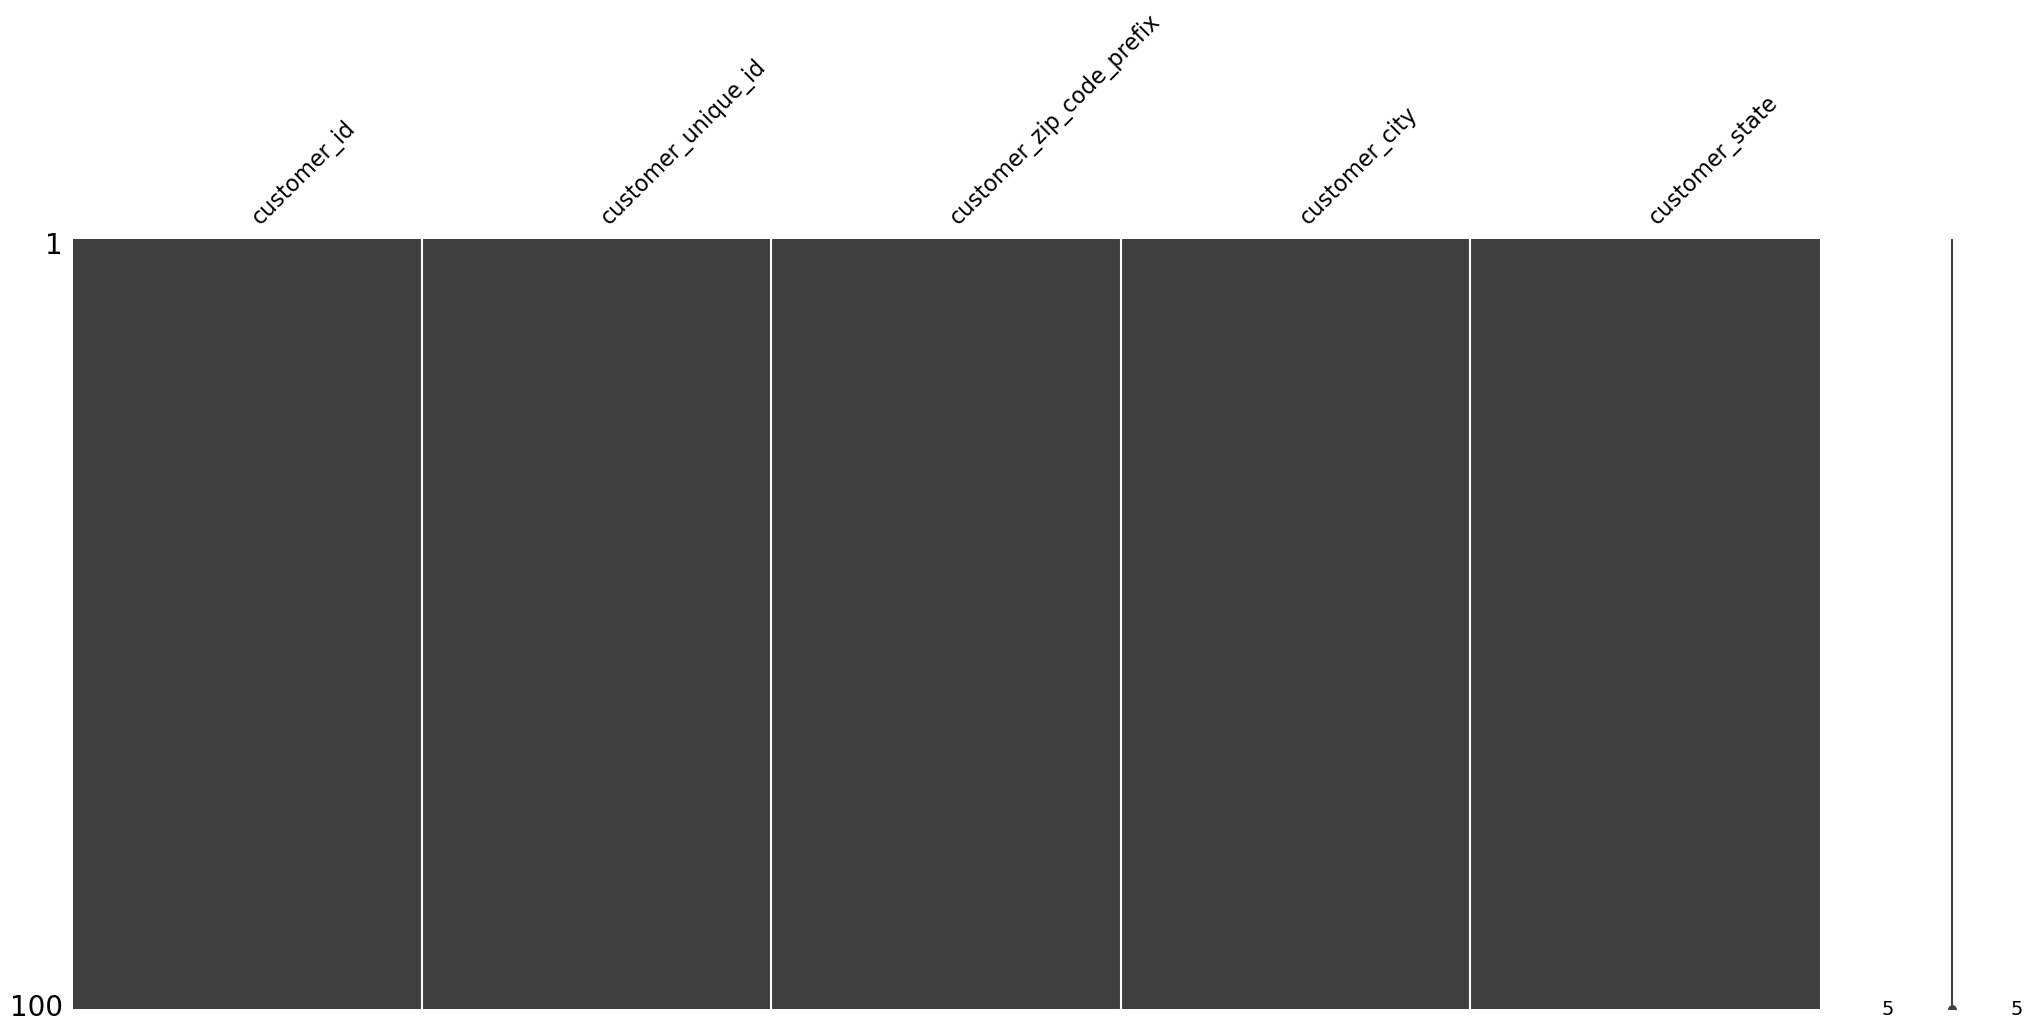

In [9]:
shape(olist_customers_dataset)

In [10]:
explore_qualitative_variables(olist_customers_dataset)



Analyzing variable: customer_id
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 99441 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à 06b8999e2fba1a1fbc88172c00ba8bc7.


Analyzing variable: customer_unique_id
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 96096 valeurs uniques.
Le mode est de 17.
La valeur du mode correspond à 8d50f5eadf50201ccdcedfb9e2ac8455.


Analyzing variable: customer_city
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 4119 valeurs uniques.
Le mode est de 15540.
La valeur du mode correspond à sao paulo.


Analyzing variable: customer_state
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 27 valeurs uniques.
Le mode est de 41746.
La valeur du mode correspond à SP.




Analyzing variable: customer_zip_code_prefix
Il y a 99441.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1003.00.
La valeur max. est de 99990.00.
La moyenne est de 35137.47.
L'étendue est de 98987.00.
Le premier quartile se situe à 11347.00.
La médiane se situe à 24416.00.
Le troisième quartile se situe à 58900.00.
L'écart interquartile est de 47553.00.
L'écart type est de 29797.94.


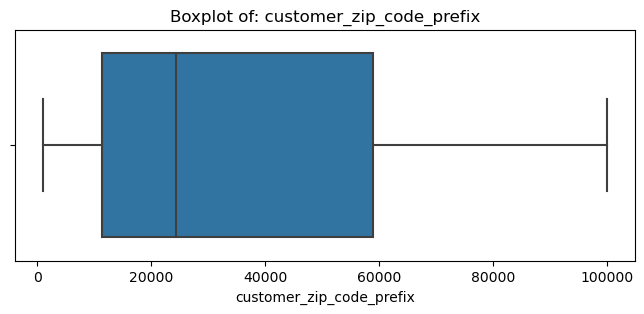

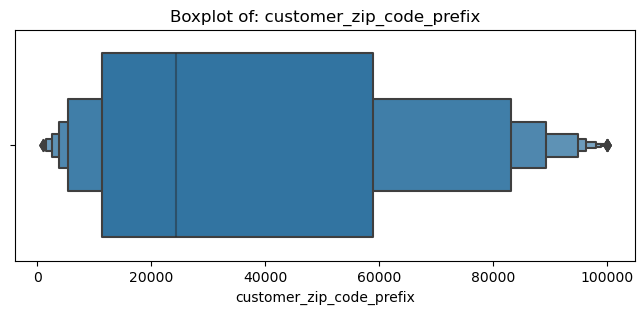

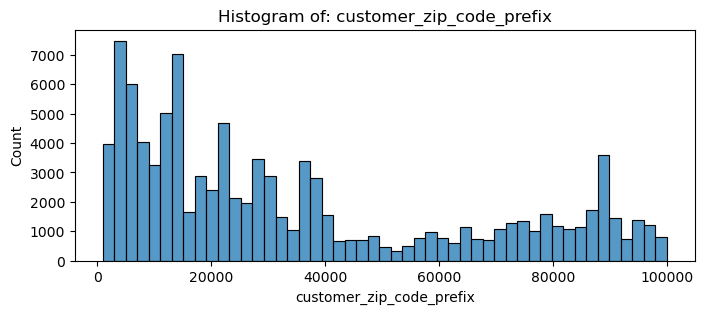

In [11]:
explore_quantitative_variables(olist_customers_dataset)

## olist_geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS



Number of Rows:  1000163
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Unique values in geolocation_zip_code_prefix:
[ 1037  1046  1041 ... 99910 99920 99952]

Unique values in geolocation_lat:
[-23.54562128 -23.54608113 -23.54612897 ... -28.06886363 -28.06863888
 -28.38893188]

Unique values in geolocation_lng:
[-46.63929205 -46.6448203  -46.64295148 ... -52.01296438 -52.01070525
 -51.84687132]

Unique values i

,N_unique values
geolocation_zip_code_prefix,19015
geolocation_lat,717360
geolocation_lng,717613
geolocation_city,8011
geolocation_state,27



'type' column not found in dataframe.

Number of missing values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Number of duplicated rows:
261831

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


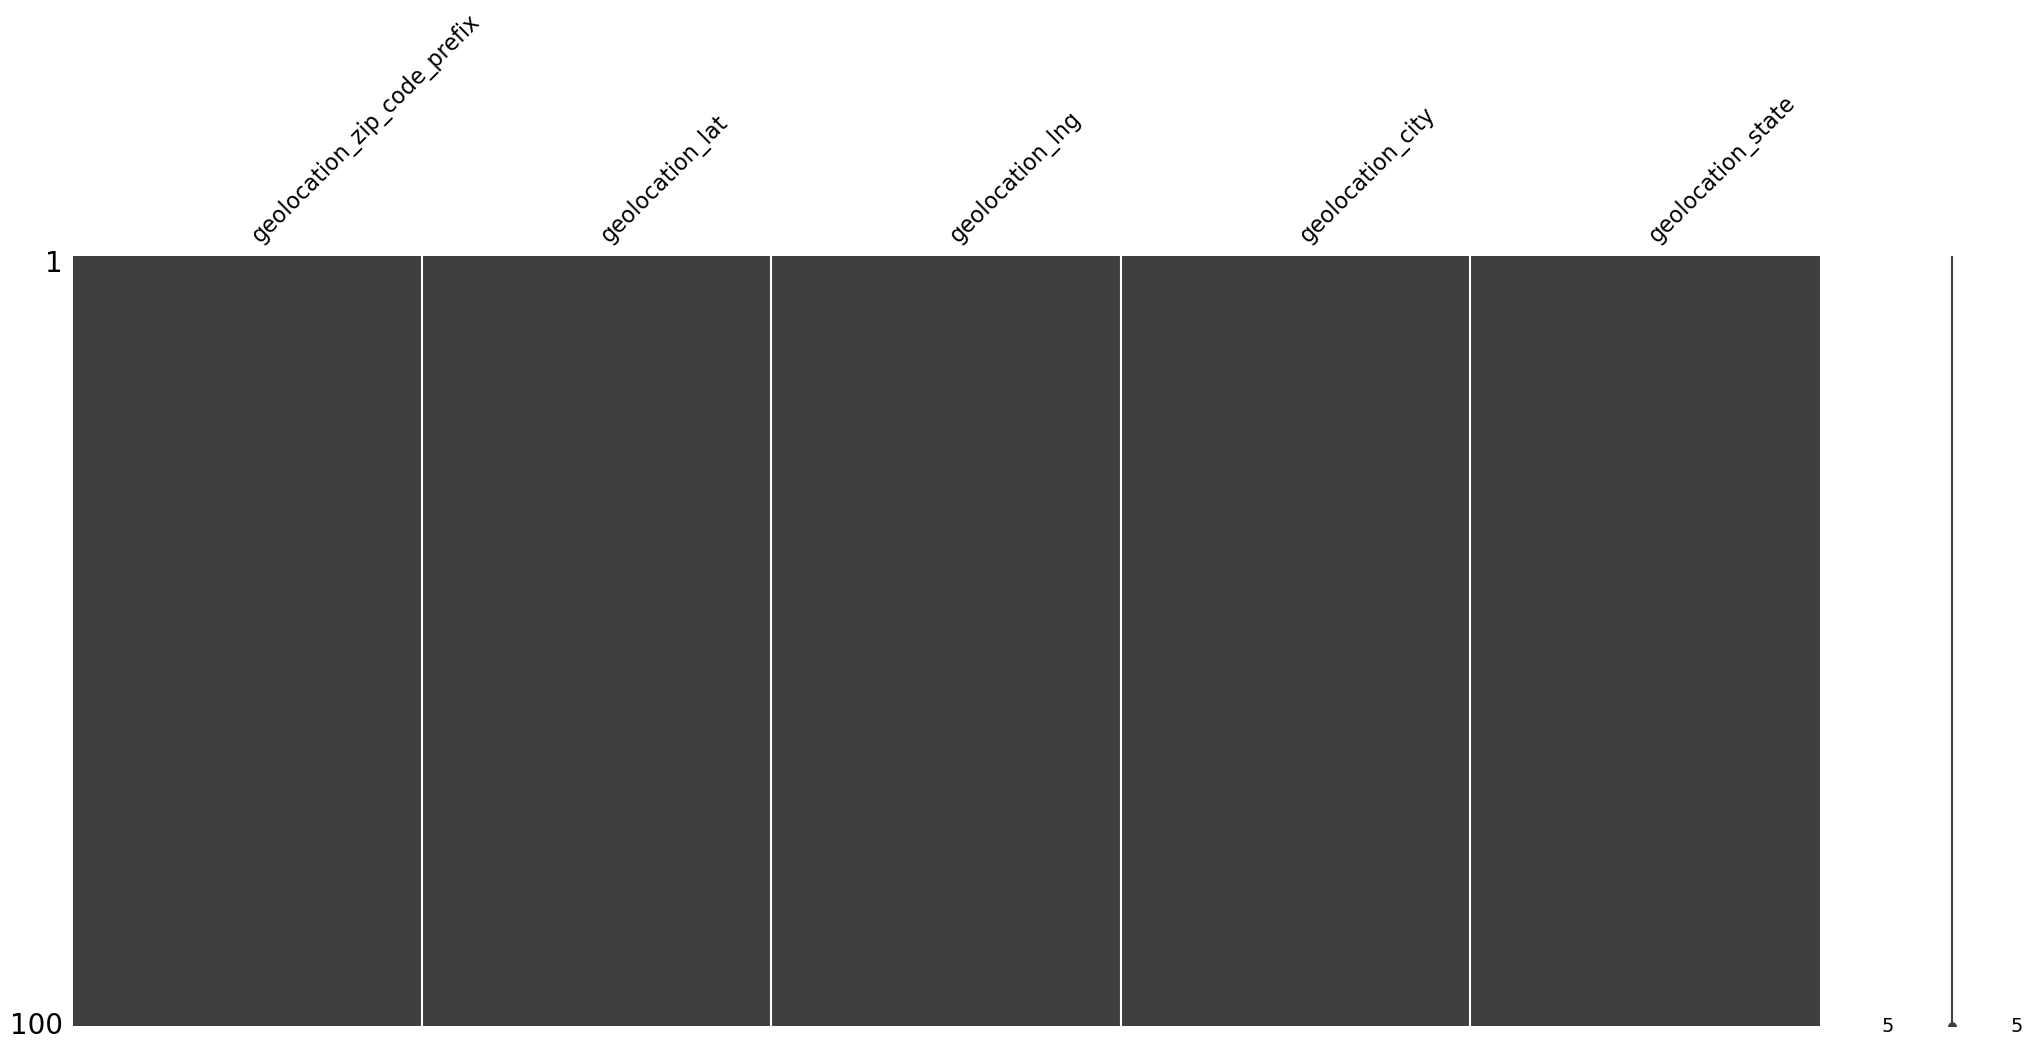

In [12]:
shape(olist_geolocation_dataset) 

In [13]:
explore_qualitative_variables(olist_geolocation_dataset)



Analyzing variable: geolocation_city
Il y a 1000163 entrées.
Il y a 0 valeurs manquantes
Il y a 8011 valeurs uniques.
Le mode est de 135800.
La valeur du mode correspond à sao paulo.


Analyzing variable: geolocation_state
Il y a 1000163 entrées.
Il y a 0 valeurs manquantes
Il y a 27 valeurs uniques.
Le mode est de 404268.
La valeur du mode correspond à SP.


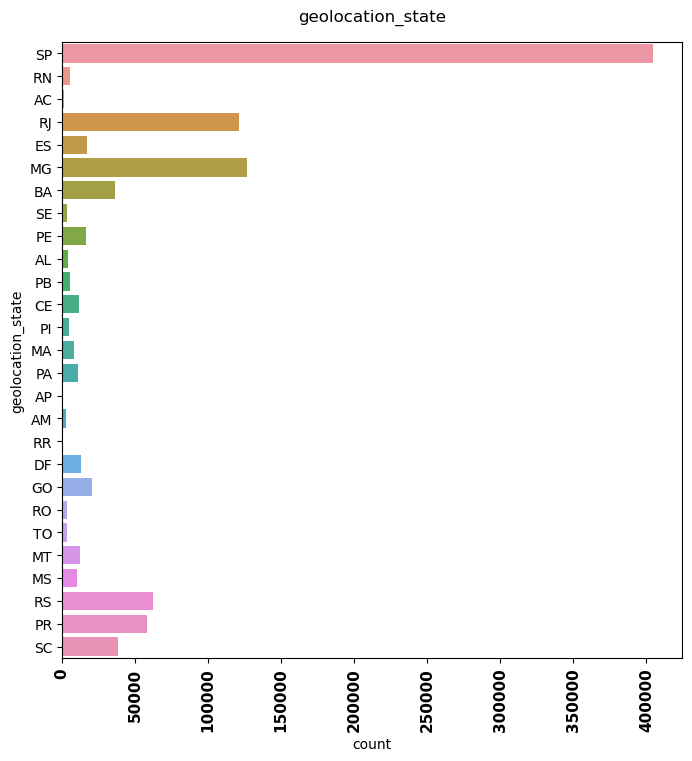

In [14]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=olist_geolocation_dataset["geolocation_state"], y = olist_geolocation_dataset["geolocation_state"].index)
Bplot.set_title("geolocation_state", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()



Analyzing variable: geolocation_zip_code_prefix
Il y a 1000163.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1001.00.
La valeur max. est de 99990.00.
La moyenne est de 36574.17.
L'étendue est de 98989.00.
Le premier quartile se situe à 11075.00.
La médiane se situe à 26530.00.
Le troisième quartile se situe à 63504.00.
L'écart interquartile est de 52429.00.
L'écart type est de 30549.34.


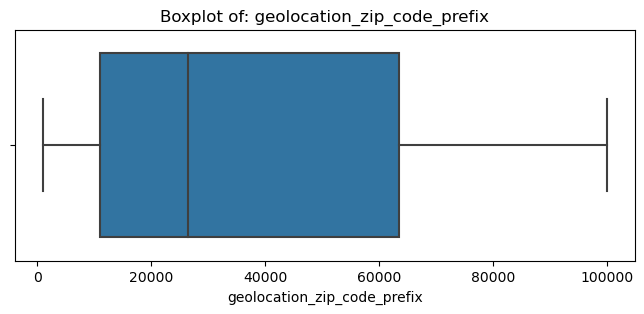

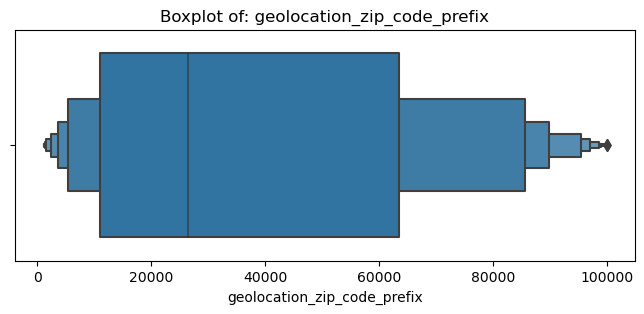

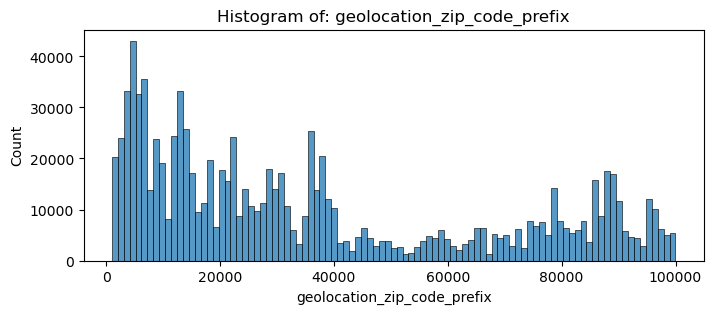



Analyzing variable: geolocation_lat
Il y a 1000163.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de -36.61.
La valeur max. est de 45.07.
La moyenne est de -21.18.
L'étendue est de 81.67.
Le premier quartile se situe à -23.60.
La médiane se situe à -22.92.
Le troisième quartile se situe à -19.98.
L'écart interquartile est de 3.62.
L'écart type est de 5.72.


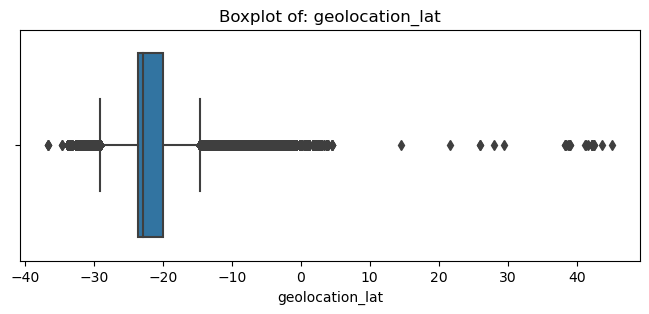

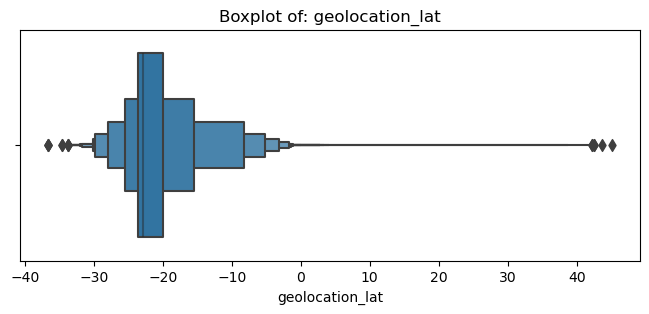

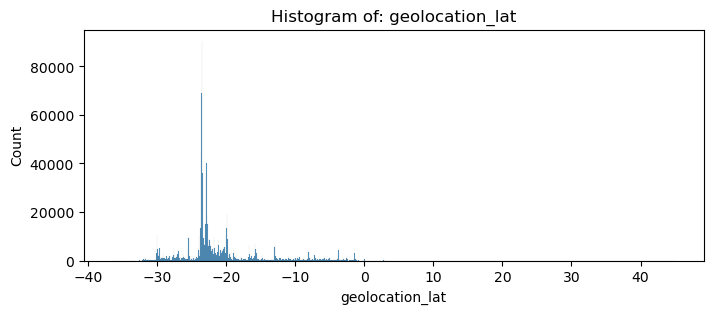



Analyzing variable: geolocation_lng
Il y a 1000163.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de -101.47.
La valeur max. est de 121.11.
La moyenne est de -46.39.
L'étendue est de 222.57.
Le premier quartile se situe à -48.57.
La médiane se situe à -46.64.
Le troisième quartile se situe à -43.77.
L'écart interquartile est de 4.81.
L'écart type est de 4.27.


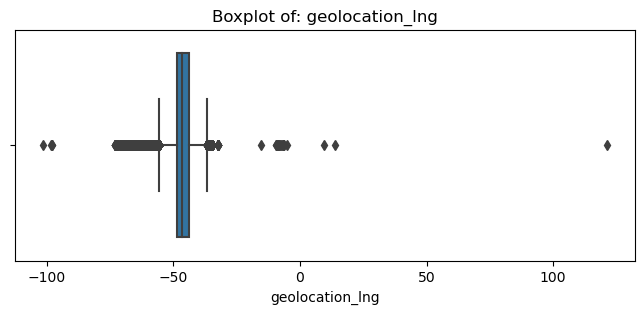

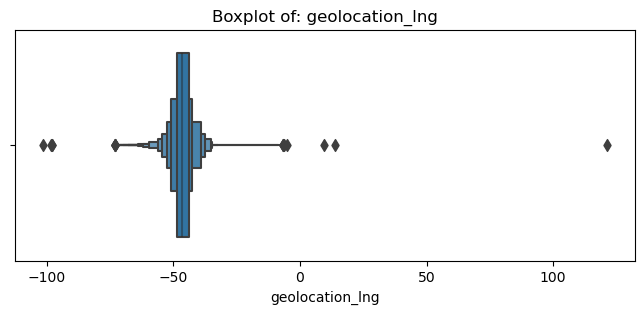

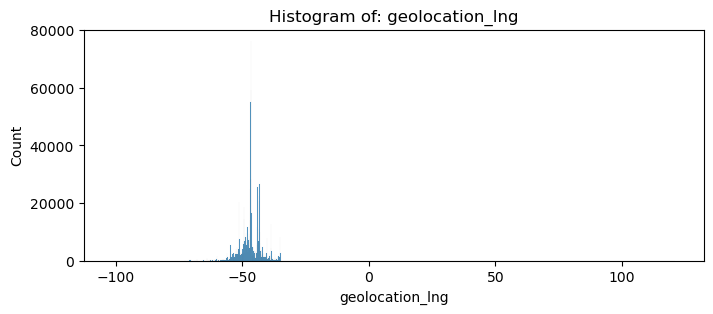

In [15]:
explore_quantitative_variables(olist_geolocation_dataset)

## olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79



Number of Rows:  112650
Number of Columns:  7

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Unique values in order_id:
['00010242fe8c5a6d1ba2dd792cb16214' '00018f77f2f0320c557190d7a144bdd3'
 '000229ec398224ef6ca0657da4fc703e' ... 'fffce4705a9662cd70adb13d4a31832d'
 'fffe18544ffabc95dfada21779c9644f' 'fffe41c64501cc87c801fd61db3f6244']

Unique values in order_item_id:
[ 1  2  3  4  5  6  7  8  9 10 

,N_unique values
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,93318
price,5968
freight_value,6999



'type' column not found in dataframe.

Number of missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


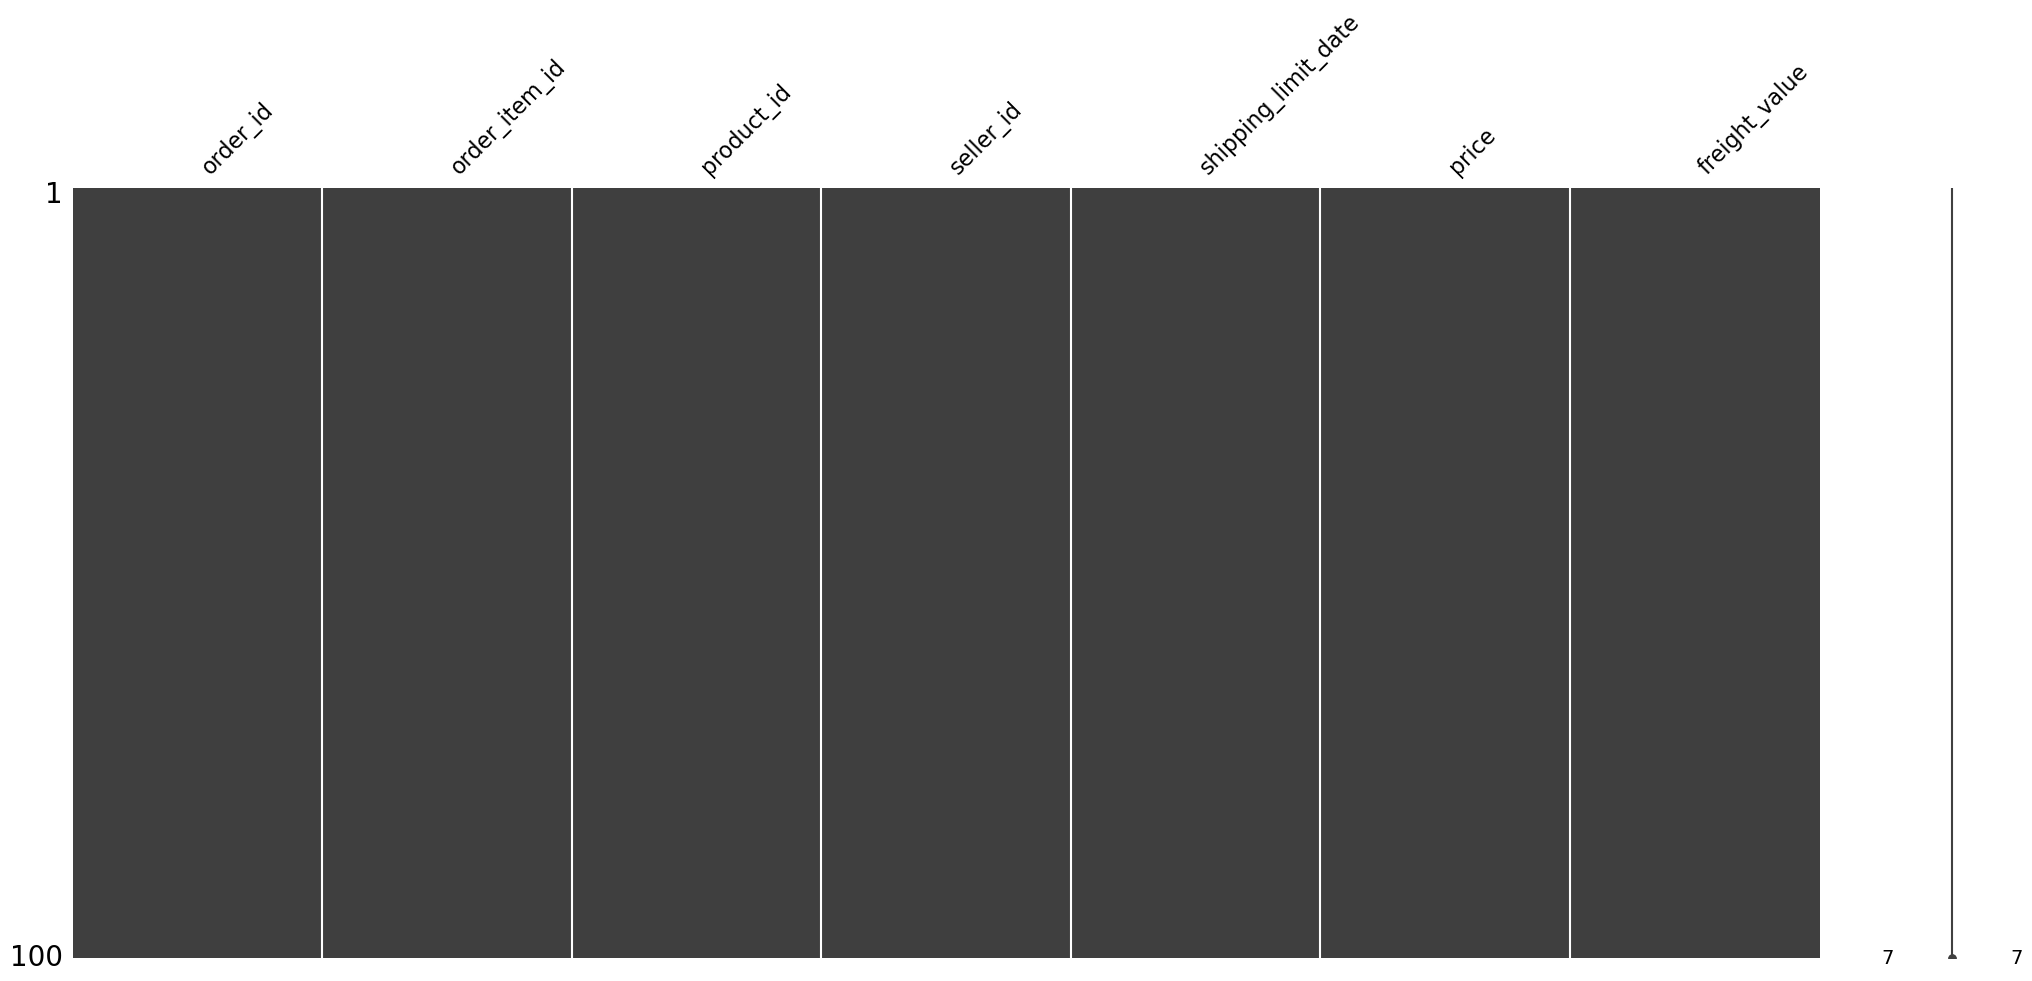

In [16]:
shape(olist_order_items_dataset)

In [17]:
explore_qualitative_variables(olist_order_items_dataset)



Analyzing variable: order_id
Il y a 112650 entrées.
Il y a 0 valeurs manquantes
Il y a 98666 valeurs uniques.
Le mode est de 21.
La valeur du mode correspond à 8272b63d03f5f79c56e9e4120aec44ef.


Analyzing variable: product_id
Il y a 112650 entrées.
Il y a 0 valeurs manquantes
Il y a 32951 valeurs uniques.
Le mode est de 527.
La valeur du mode correspond à aca2eb7d00ea1a7b8ebd4e68314663af.


Analyzing variable: seller_id
Il y a 112650 entrées.
Il y a 0 valeurs manquantes
Il y a 3095 valeurs uniques.
Le mode est de 2033.
La valeur du mode correspond à 6560211a19b47992c3666cc44a7e94c0.


Analyzing variable: shipping_limit_date
Il y a 112650 entrées.
Il y a 0 valeurs manquantes
Il y a 93318 valeurs uniques.
Le mode est de 21.
La valeur du mode correspond à 2017-07-21 18:25:23.




Analyzing variable: order_item_id
Il y a 112650.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1.00.
La valeur max. est de 21.00.
La moyenne est de 1.20.
L'étendue est de 20.00.
Le premier quartile se situe à 1.00.
La médiane se situe à 1.00.
Le troisième quartile se situe à 1.00.
L'écart interquartile est de 0.00.
L'écart type est de 0.71.


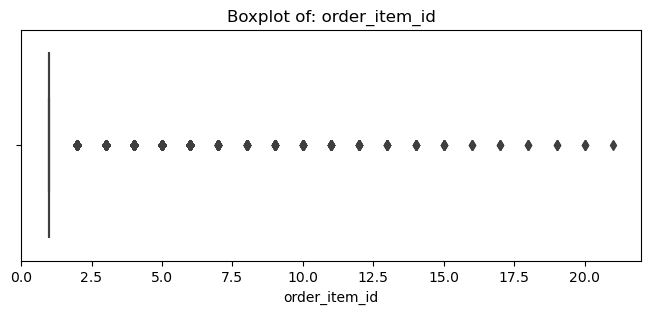

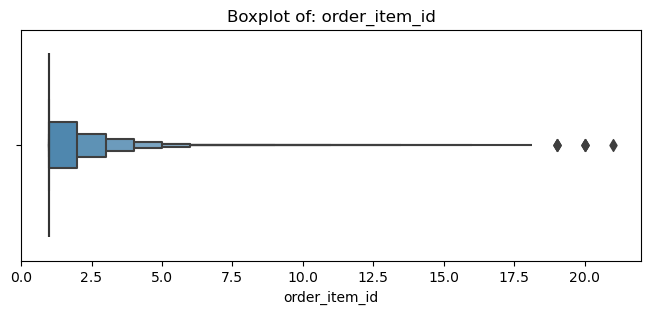

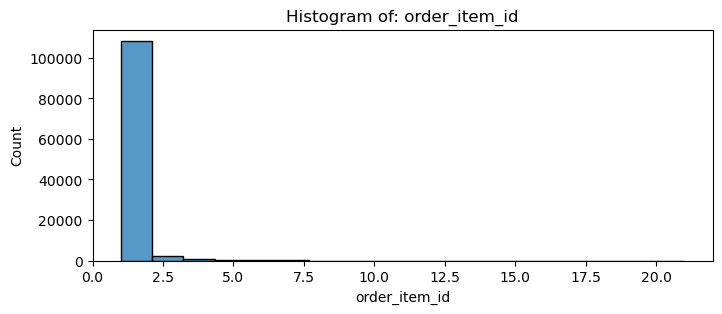



Analyzing variable: price
Il y a 112650.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 0.85.
La valeur max. est de 6735.00.
La moyenne est de 120.65.
L'étendue est de 6734.15.
Le premier quartile se situe à 39.90.
La médiane se situe à 74.99.
Le troisième quartile se situe à 134.90.
L'écart interquartile est de 95.00.
L'écart type est de 183.63.


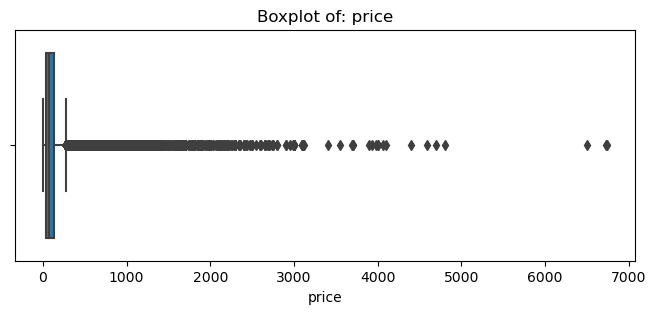

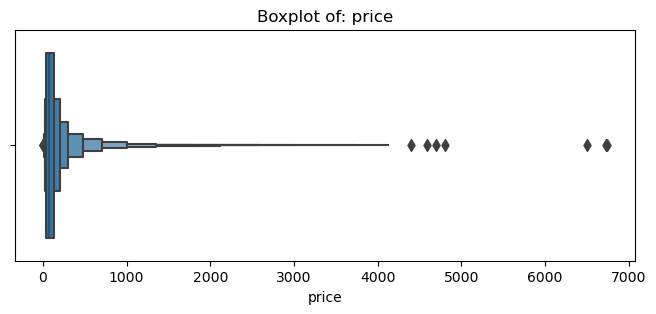

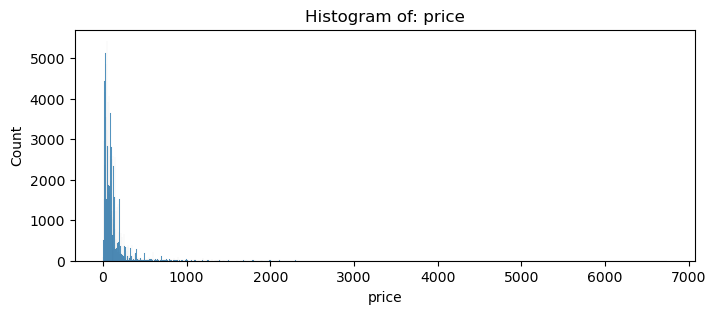



Analyzing variable: freight_value
Il y a 112650.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 0.00.
La valeur max. est de 409.68.
La moyenne est de 19.99.
L'étendue est de 409.68.
Le premier quartile se situe à 13.08.
La médiane se situe à 16.26.
Le troisième quartile se situe à 21.15.
L'écart interquartile est de 8.07.
L'écart type est de 15.81.


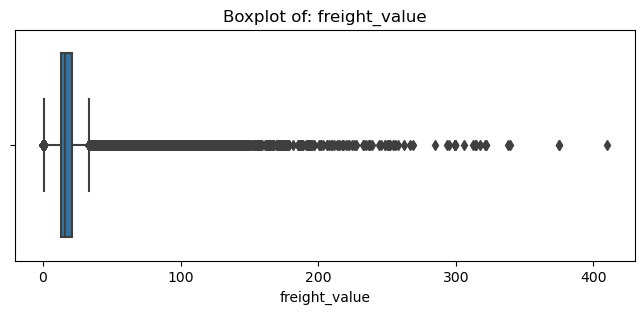

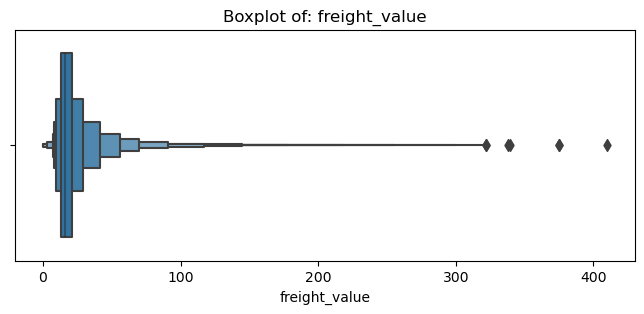

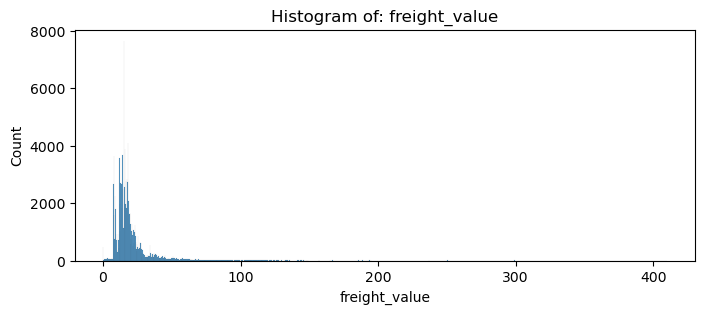

In [18]:
explore_quantitative_variables(olist_order_items_dataset)

## olist_order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58



Number of Rows:  103886
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Unique values in order_id:
['b81ef226f3fe1789b1e8b2acac839d17' 'a9810da82917af2d9aefd1278f1dcfa0'
 '25e8ea4e93396b6fa0d3dd708e76c1bd' ... '32609bbb3dd69b3c066a6860554a77bf'
 'b8b61059626efa996a60be9bb9320e10' '28bbae6599b09d39ca406b747b6632b1']

Unique values in payment_sequential:
[ 1  2  4  5  3  8  6  7 10 11 17 19 27 12  9 15 13 14 16 25 22 26 29 28
 18 21 24 23 20]

Unique values in payment_type:

,N_unique values
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077



'type' column not found in dataframe.

Number of missing values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


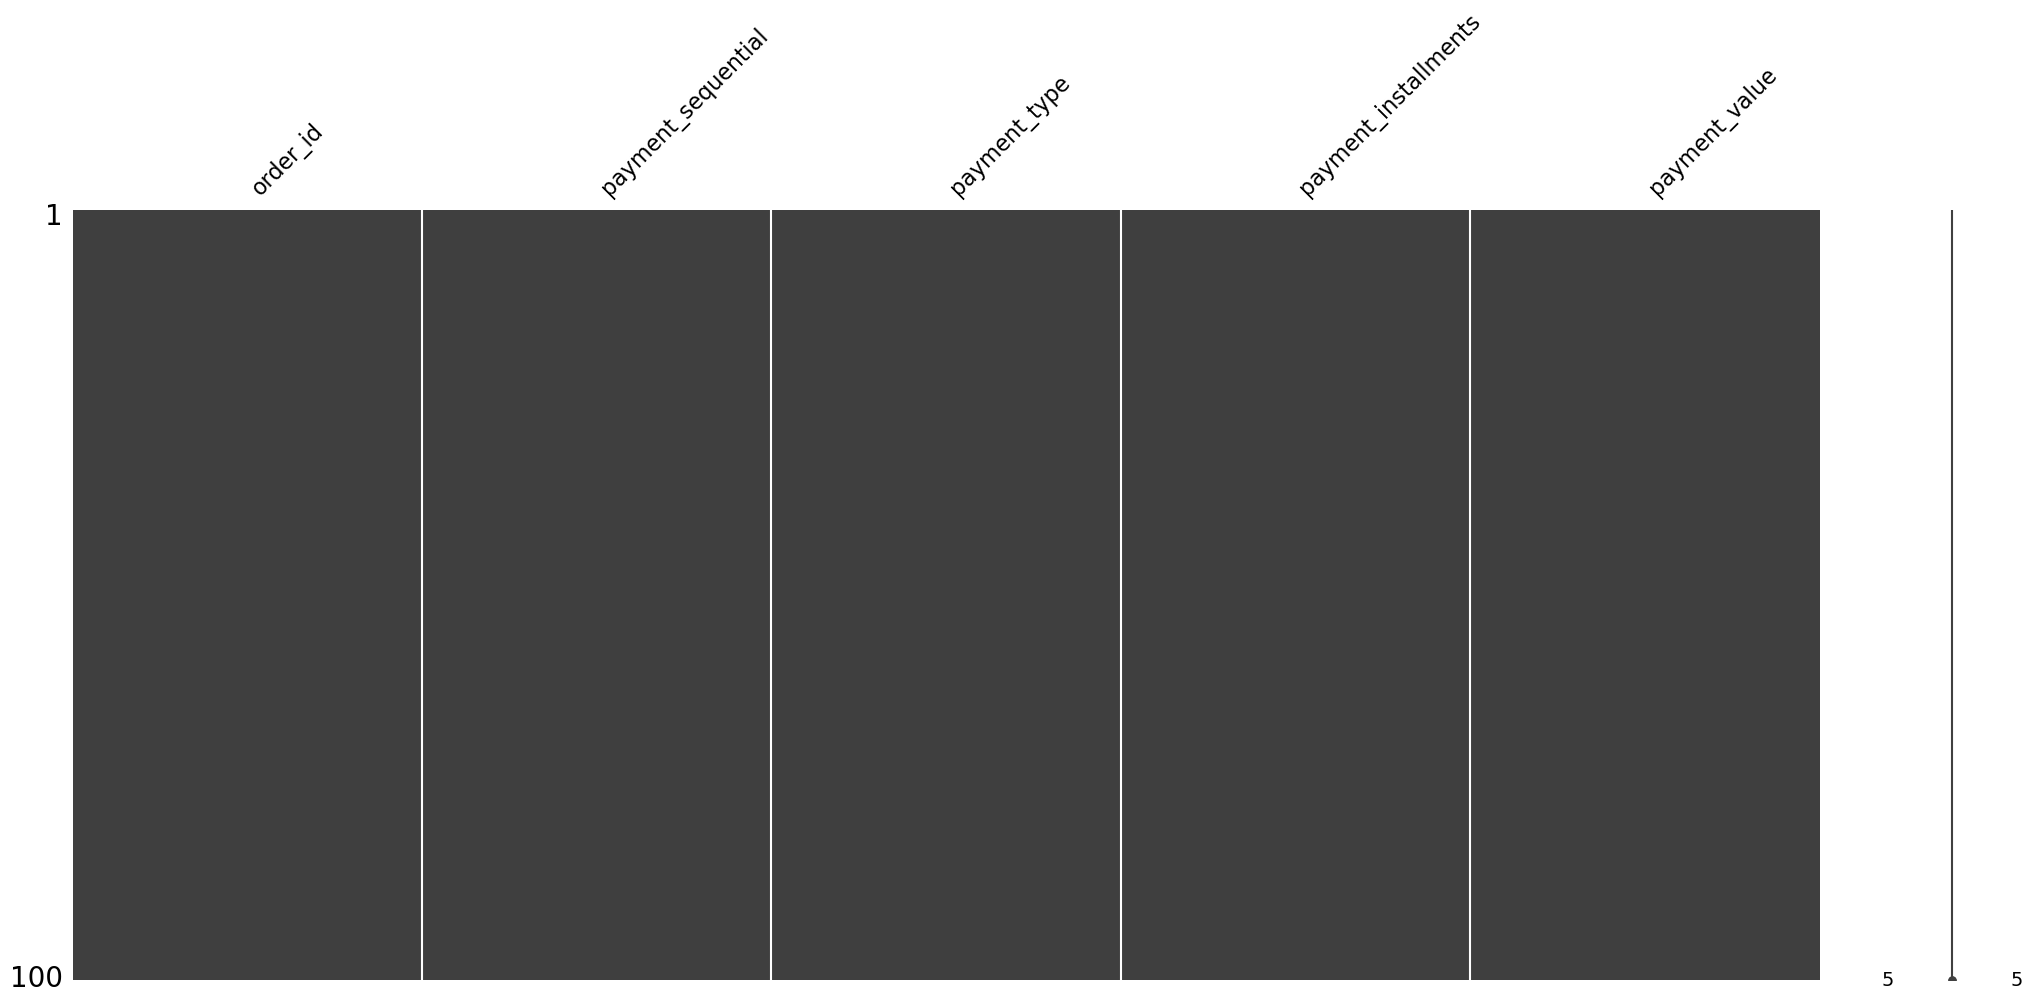

In [19]:
shape(olist_order_payments_dataset)

In [20]:
explore_qualitative_variables(olist_order_payments_dataset)



Analyzing variable: order_id
Il y a 103886 entrées.
Il y a 0 valeurs manquantes
Il y a 99440 valeurs uniques.
Le mode est de 29.
La valeur du mode correspond à fa65dad1b0e818e3ccc5cb0e39231352.


Analyzing variable: payment_type
Il y a 103886 entrées.
Il y a 0 valeurs manquantes
Il y a 5 valeurs uniques.
Le mode est de 76795.
La valeur du mode correspond à credit_card.




Analyzing variable: payment_sequential
Il y a 103886.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1.00.
La valeur max. est de 29.00.
La moyenne est de 1.09.
L'étendue est de 28.00.
Le premier quartile se situe à 1.00.
La médiane se situe à 1.00.
Le troisième quartile se situe à 1.00.
L'écart interquartile est de 0.00.
L'écart type est de 0.71.


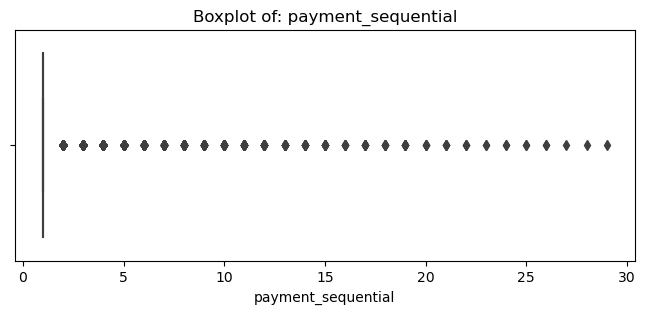

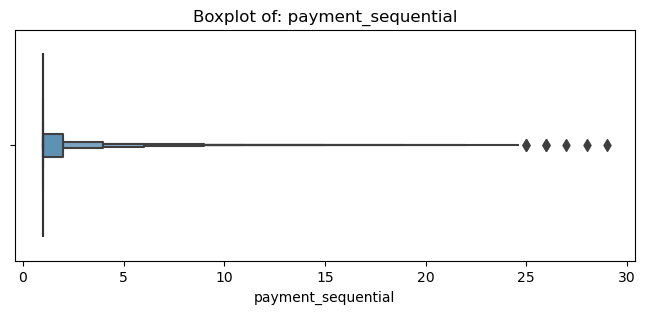

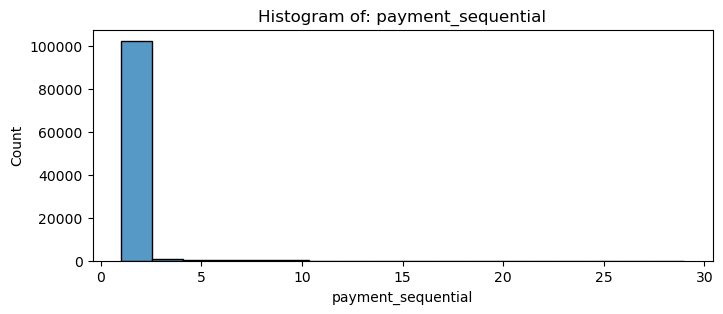



Analyzing variable: payment_installments
Il y a 103886.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 0.00.
La valeur max. est de 24.00.
La moyenne est de 2.85.
L'étendue est de 24.00.
Le premier quartile se situe à 1.00.
La médiane se situe à 1.00.
Le troisième quartile se situe à 4.00.
L'écart interquartile est de 3.00.
L'écart type est de 2.69.


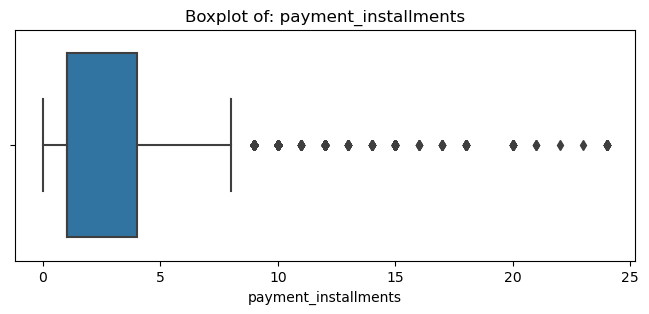

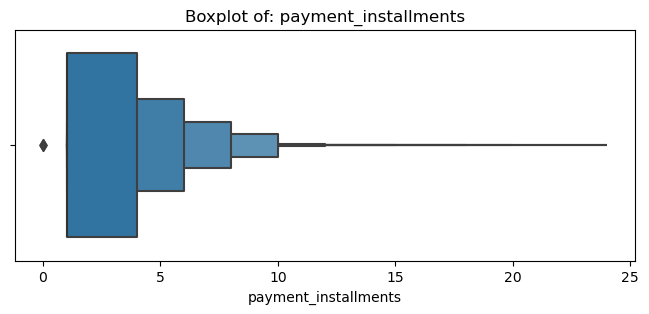

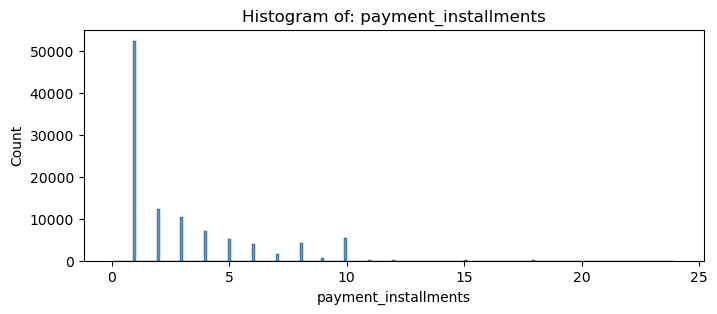



Analyzing variable: payment_value
Il y a 103886.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 0.00.
La valeur max. est de 13664.08.
La moyenne est de 154.10.
L'étendue est de 13664.08.
Le premier quartile se situe à 56.79.
La médiane se situe à 100.00.
Le troisième quartile se situe à 171.84.
L'écart interquartile est de 115.05.
L'écart type est de 217.49.


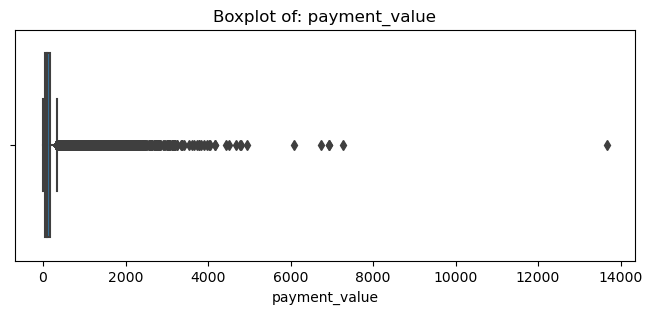

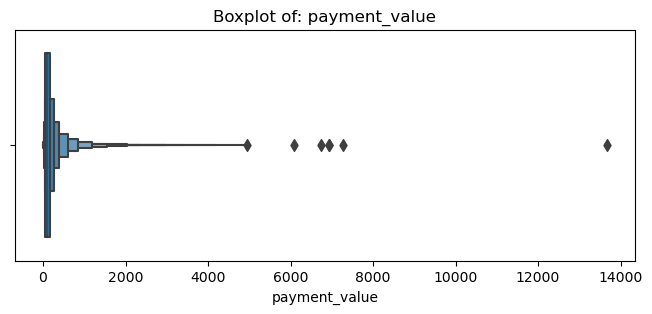

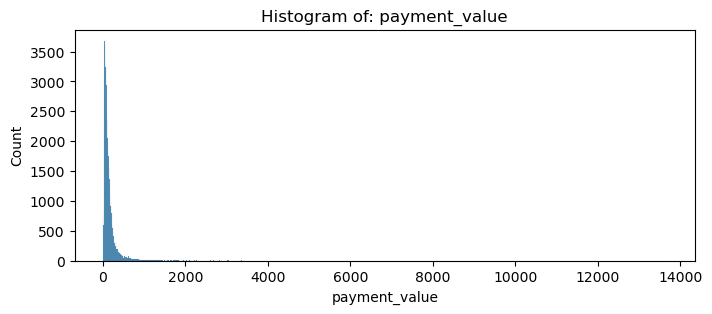

In [21]:
explore_quantitative_variables(olist_order_payments_dataset)

## olist_order_reviews_dataset)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49



Number of Rows:  99224
Number of Columns:  7

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Unique values in review_id:
['7bc2406110b926393aa56f80a40eba40' '80e641a11e56f04c1ad469d5645fdfde'
 '228ce5500dc1d8e020d8d1322874b6f0' ... 'b3de70c89b1510c4cd3d0649fd302472'
 '1adeb9d84d72fe4e337617733eb85149' 'efe49f1d6f951dd88b51e6ccd4cc548f']

Unique values in order_id:
['73fc7af87114b39712e6da79b0a377

,N_unique values
review_id,98410
order_id,98673
review_score,5
review_comment_title,4527
review_comment_message,36159
review_creation_date,636
review_answer_timestamp,98248



'type' column not found in dataframe.

Number of missing values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


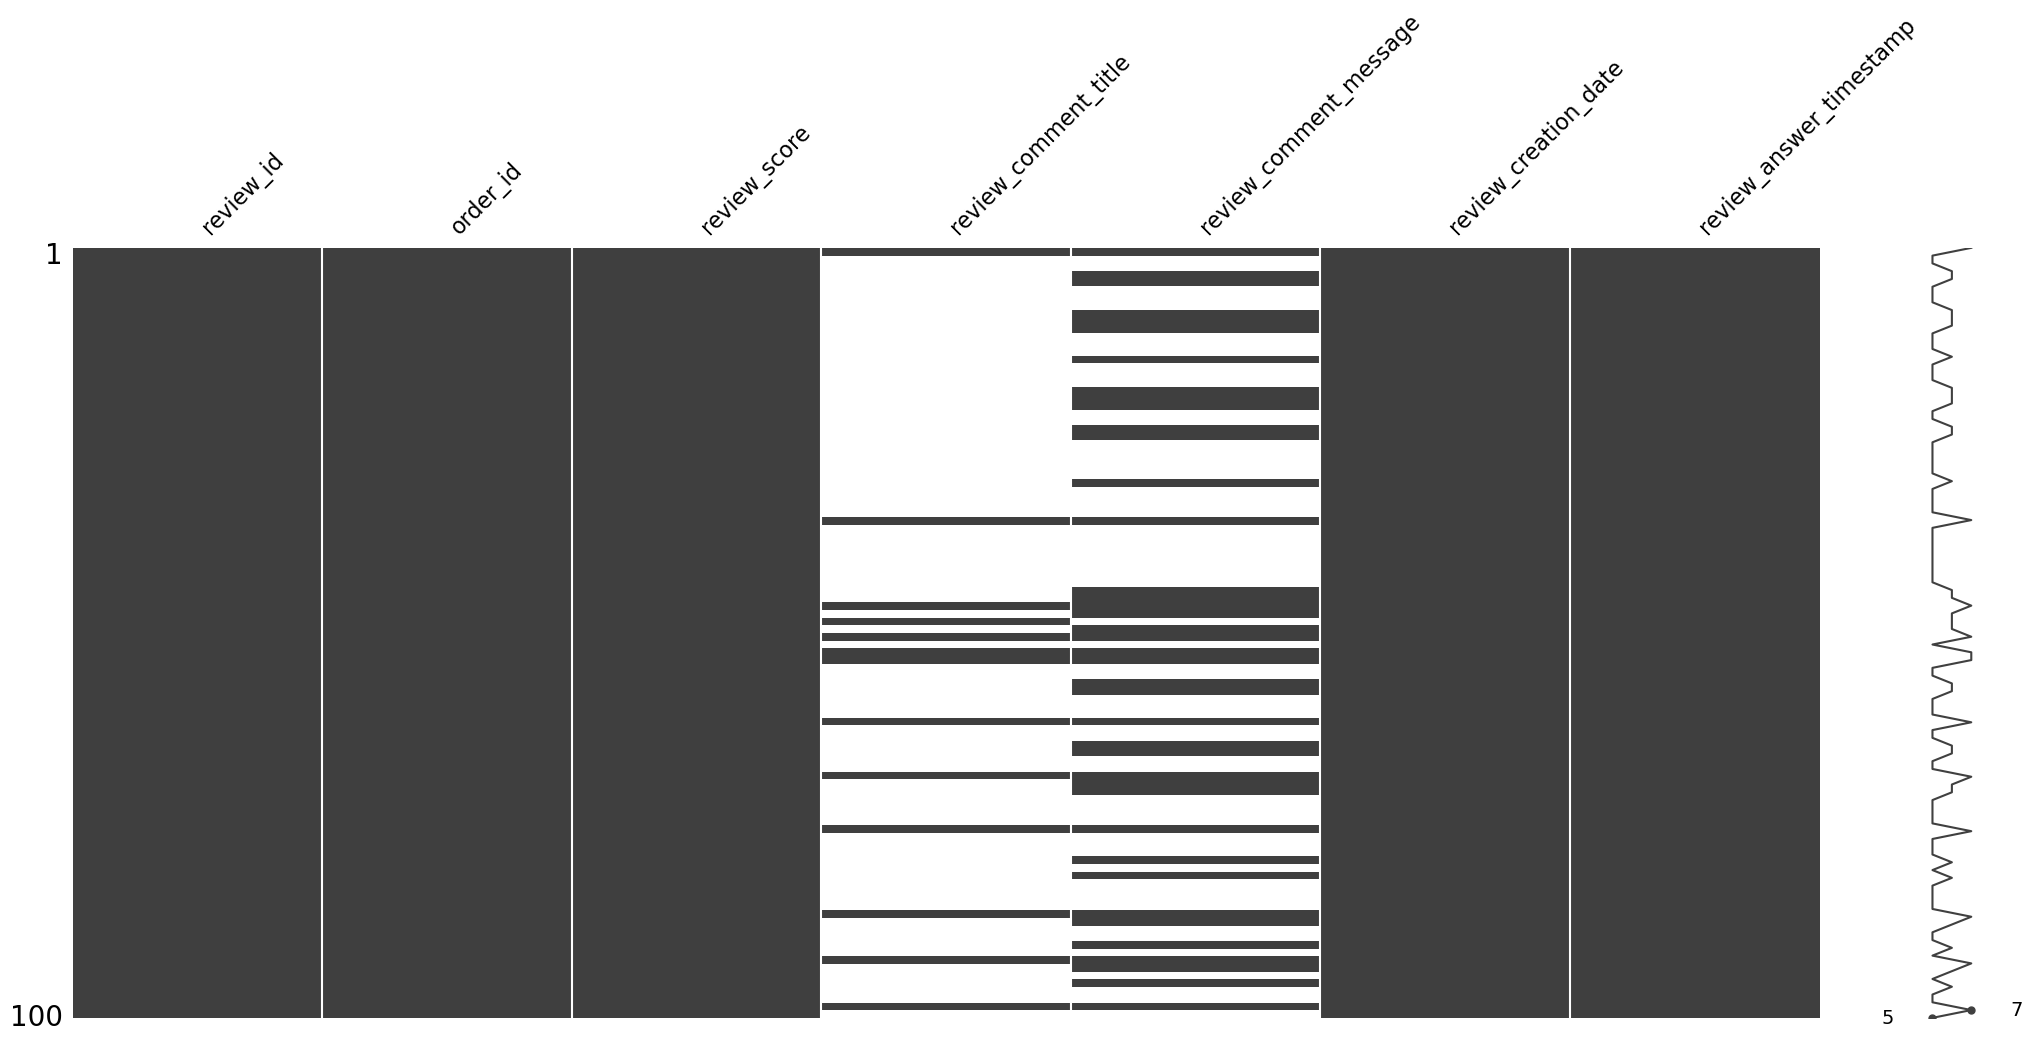

In [22]:
shape(olist_order_reviews_dataset)

In [23]:
explore_qualitative_variables(olist_order_reviews_dataset)



Analyzing variable: review_id
Il y a 99224 entrées.
Il y a 0 valeurs manquantes
Il y a 98410 valeurs uniques.
Le mode est de 3.
La valeur du mode correspond à 7b606b0d57b078384f0b58eac1d41d78.


Analyzing variable: order_id
Il y a 99224 entrées.
Il y a 0 valeurs manquantes
Il y a 98673 valeurs uniques.
Le mode est de 3.
La valeur du mode correspond à c88b1d1b157a9999ce368f218a407141.


Analyzing variable: review_comment_title
Il y a 11568 entrées.
Il y a 87656 valeurs manquantes
Il y a 4527 valeurs uniques.
Le mode est de 423.
La valeur du mode correspond à Recomendo.


Analyzing variable: review_comment_message
Il y a 40977 entrées.
Il y a 58247 valeurs manquantes
Il y a 36159 valeurs uniques.
Le mode est de 230.
La valeur du mode correspond à Muito bom.


Analyzing variable: review_creation_date
Il y a 99224 entrées.
Il y a 0 valeurs manquantes
Il y a 636 valeurs uniques.
Le mode est de 463.
La valeur du mode correspond à 2017-12-19 00:00:00.


Analyzing variable: review_answer_tim



Analyzing variable: review_score
Il y a 99224.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1.00.
La valeur max. est de 5.00.
La moyenne est de 4.09.
L'étendue est de 4.00.
Le premier quartile se situe à 4.00.
La médiane se situe à 5.00.
Le troisième quartile se situe à 5.00.
L'écart interquartile est de 1.00.
L'écart type est de 1.35.


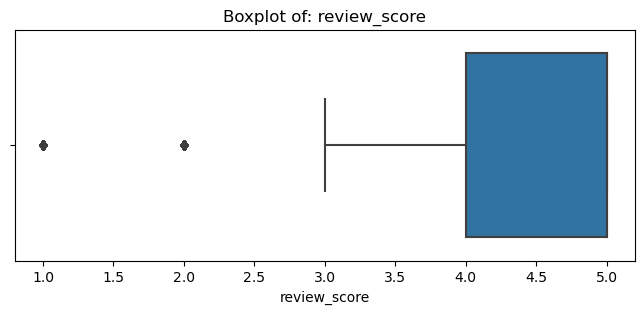

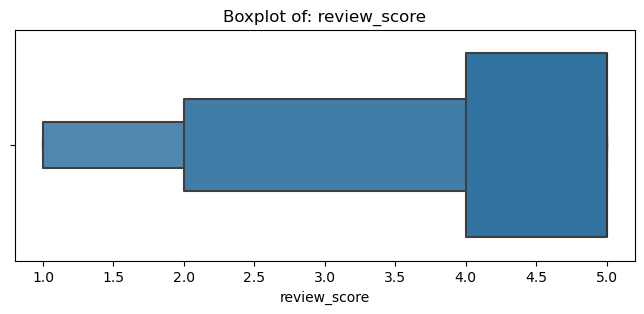

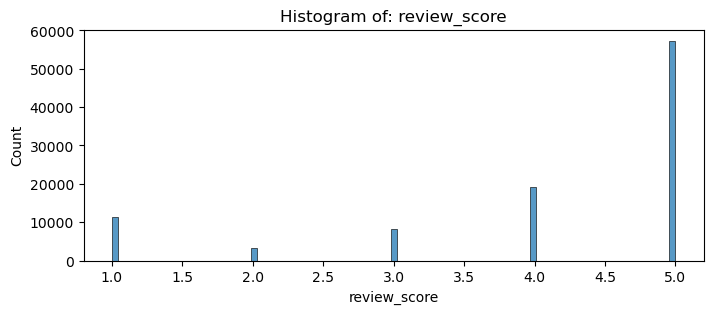

In [24]:
explore_quantitative_variables(olist_order_reviews_dataset)

## olist_orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00



Number of Rows:  99441
Number of Columns:  8

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Unique values in order_id:
['e481f51cbdc54678b7cc49136f2d6af7' '53cdb2fc8bc7dce0b6741e2150273451'
 '47770eb9100c2d0c44946d9cf07ec65d' ... '83c1379a015df1e13d02aae0204711ab'
 '11c177c8e97725db2631073c19f0

,N_unique values
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459



'type' column not found in dataframe.

Number of missing values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


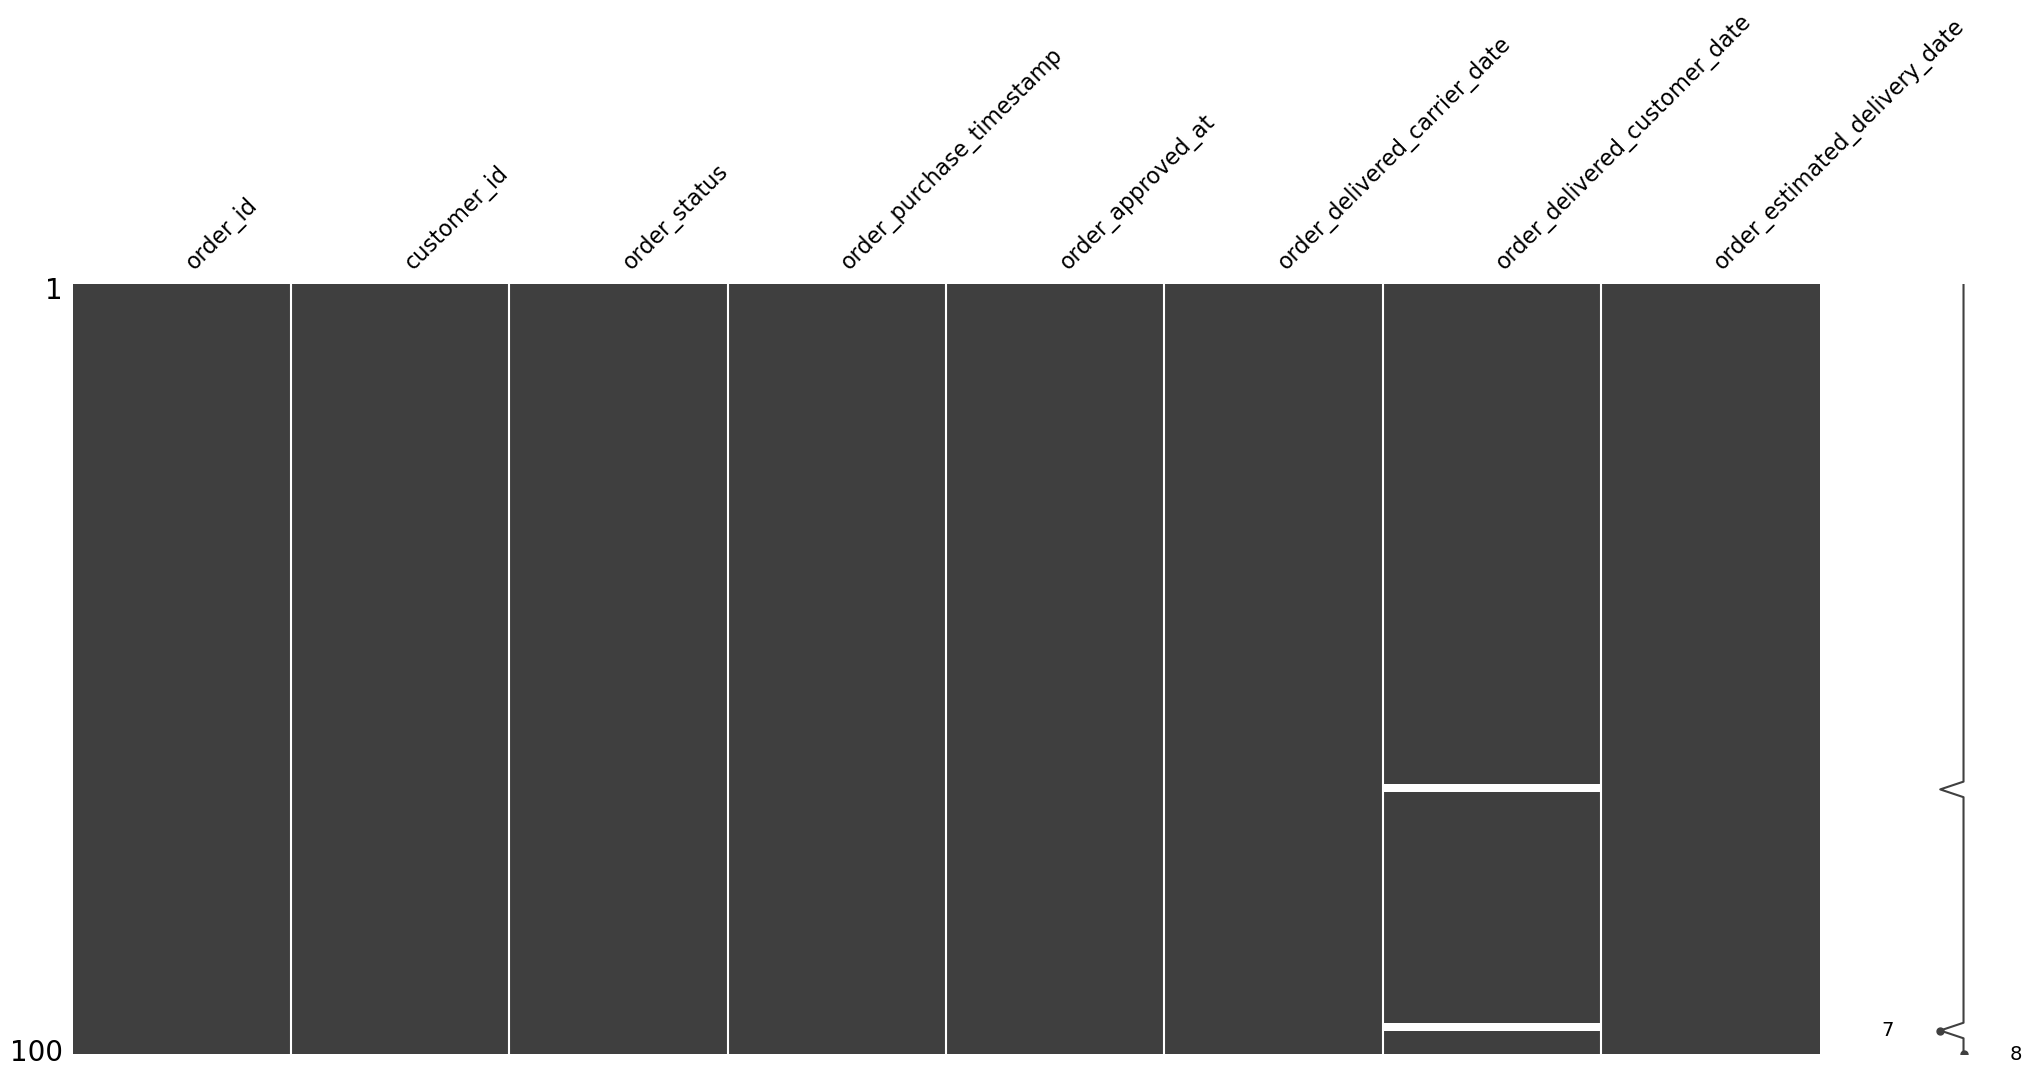

In [25]:
shape(olist_orders_dataset)

In [26]:
explore_qualitative_variables(olist_orders_dataset)



Analyzing variable: order_id
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 99441 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à e481f51cbdc54678b7cc49136f2d6af7.


Analyzing variable: customer_id
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 99441 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à 9ef432eb6251297304e76186b10a928d.


Analyzing variable: order_status
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 8 valeurs uniques.
Le mode est de 96478.
La valeur du mode correspond à delivered.


Analyzing variable: order_purchase_timestamp
Il y a 99441 entrées.
Il y a 0 valeurs manquantes
Il y a 98875 valeurs uniques.
Le mode est de 3.
La valeur du mode correspond à 2018-04-11 10:48:14.


Analyzing variable: order_approved_at
Il y a 99281 entrées.
Il y a 160 valeurs manquantes
Il y a 90733 valeurs uniques.
Le mode est de 9.
La valeur du mode correspond à 2018-02-27 04:31:10.


Analyzing variable: order_delivered_carrier

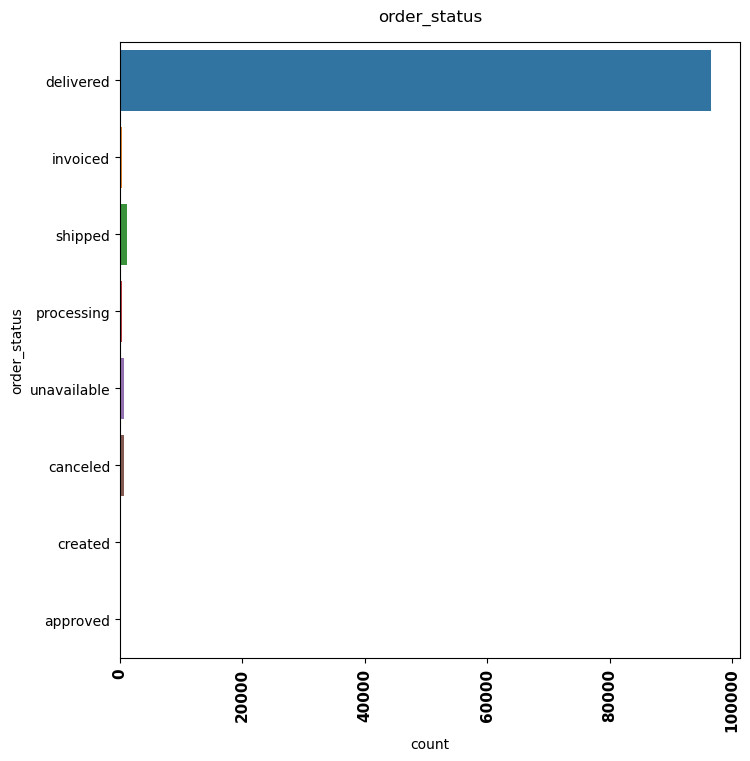

In [27]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=olist_orders_dataset["order_status"], y = olist_orders_dataset["order_status"].index)
Bplot.set_title("order_status", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()


In [28]:
# Il n'y a pas de variables quantitatives
explore_quantitative_variables(olist_orders_dataset) 

## olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0



Number of Rows:  32951
Number of Columns:  9

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Unique values in product_id:
['1e9e8ef04dbcff4541ed26657ea517e5' '3aa071139cb16b67ca9e5dea641aaa2f'
 '96bd76ec8810374ed1b65e291975717f' ... '9a7c6041fa959

,N_unique values
product_id,32951
product_category_name,73
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95



'type' column not found in dataframe.

Number of missing values:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


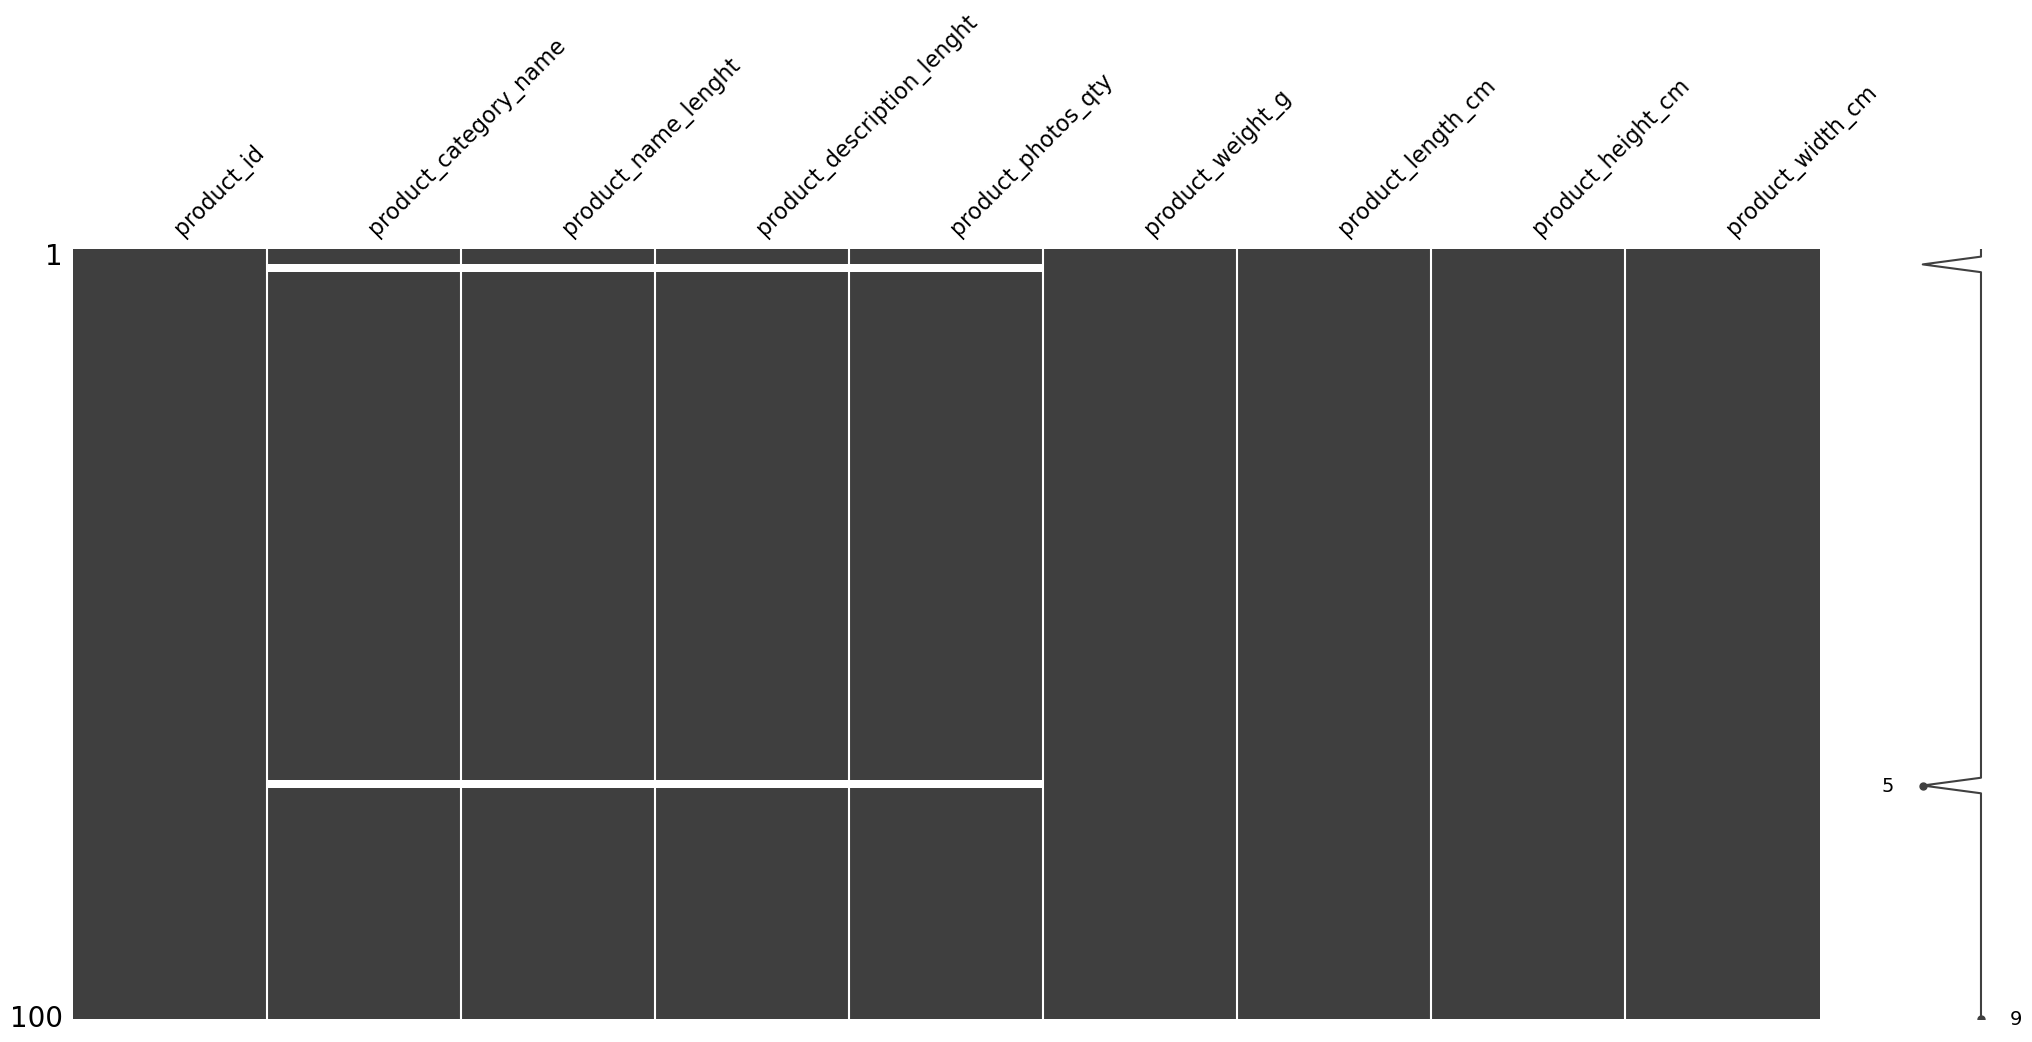

In [29]:
shape(olist_products_dataset)

In [30]:
explore_qualitative_variables(olist_products_dataset)



Analyzing variable: product_id
Il y a 32951 entrées.
Il y a 0 valeurs manquantes
Il y a 32951 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à 1e9e8ef04dbcff4541ed26657ea517e5.


Analyzing variable: product_category_name
Il y a 32341 entrées.
Il y a 610 valeurs manquantes
Il y a 73 valeurs uniques.
Le mode est de 3029.
La valeur du mode correspond à cama_mesa_banho.


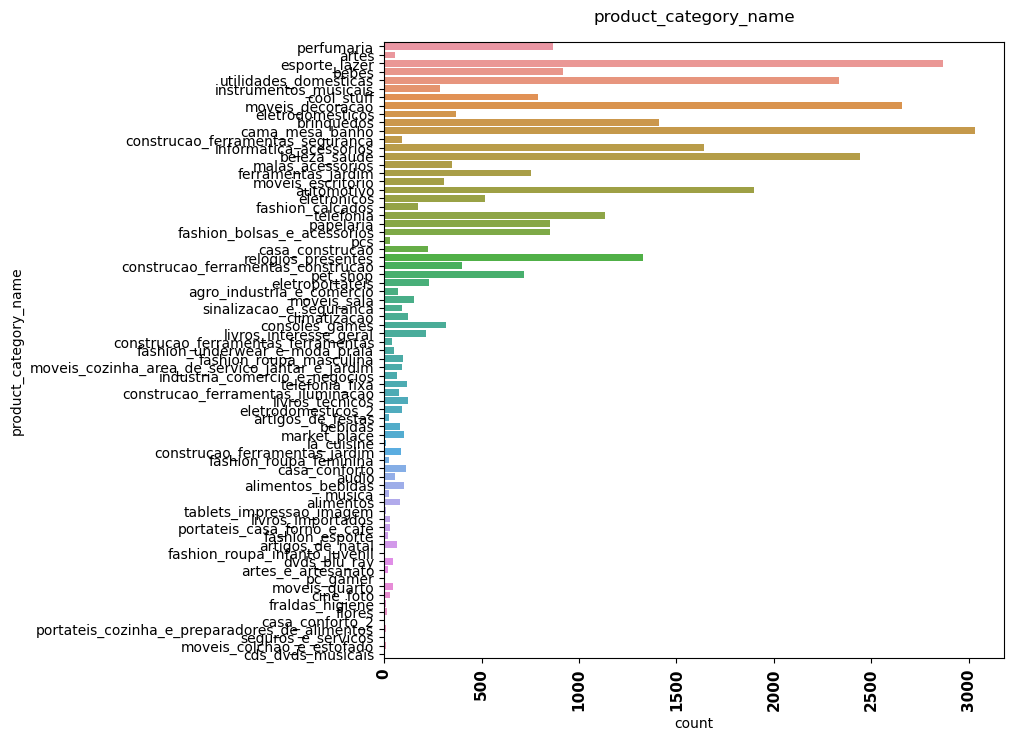

In [31]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=olist_products_dataset["product_category_name"], y = olist_products_dataset["product_category_name"].index)
Bplot.set_title("product_category_name", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()




Analyzing variable: product_name_lenght
Il y a 32341.0 entrées.
Il y a 610 valeurs manquantes
La valeur min. est de 5.00.
La valeur max. est de 76.00.
La moyenne est de 48.48.
L'étendue est de 71.00.
Le premier quartile se situe à 42.00.
La médiane se situe à 51.00.
Le troisième quartile se situe à 57.00.
L'écart interquartile est de 15.00.
L'écart type est de 10.25.


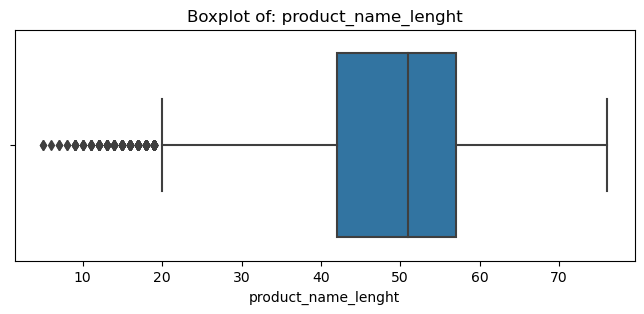

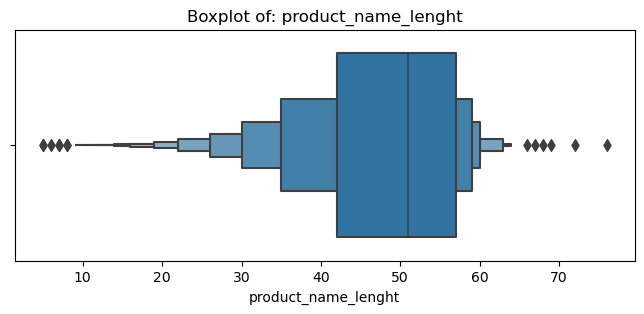

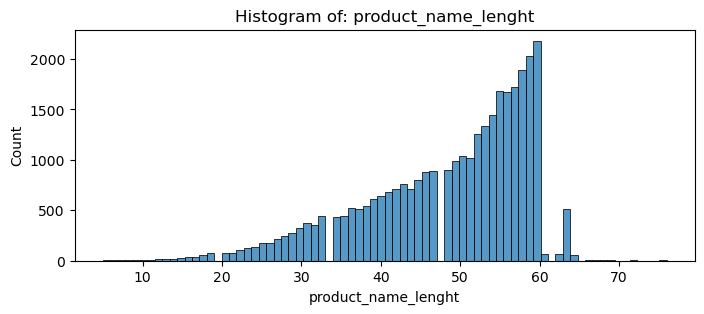



Analyzing variable: product_description_lenght
Il y a 32341.0 entrées.
Il y a 610 valeurs manquantes
La valeur min. est de 4.00.
La valeur max. est de 3992.00.
La moyenne est de 771.50.
L'étendue est de 3988.00.
Le premier quartile se situe à 339.00.
La médiane se situe à 595.00.
Le troisième quartile se situe à 972.00.
L'écart interquartile est de 633.00.
L'écart type est de 635.12.


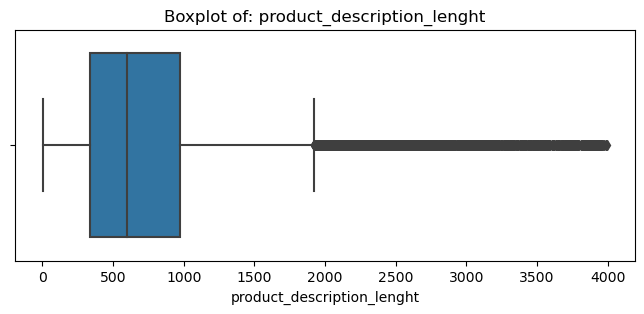

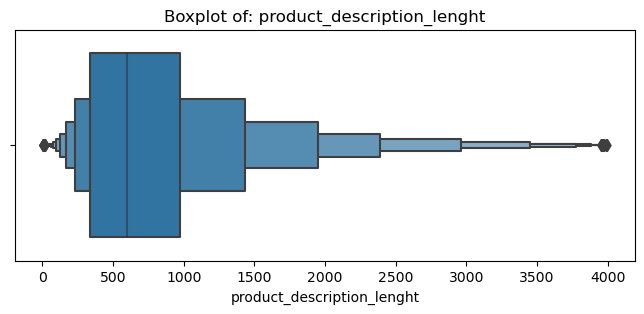

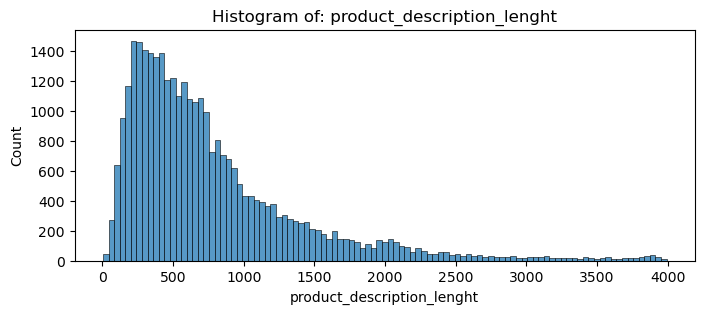



Analyzing variable: product_photos_qty
Il y a 32341.0 entrées.
Il y a 610 valeurs manquantes
La valeur min. est de 1.00.
La valeur max. est de 20.00.
La moyenne est de 2.19.
L'étendue est de 19.00.
Le premier quartile se situe à 1.00.
La médiane se situe à 1.00.
Le troisième quartile se situe à 3.00.
L'écart interquartile est de 2.00.
L'écart type est de 1.74.


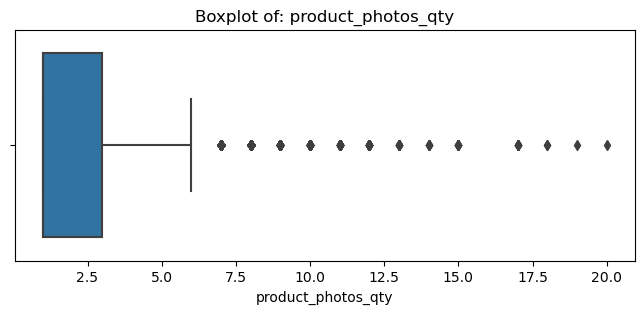

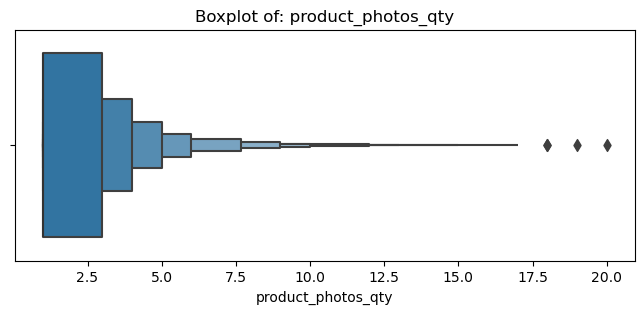

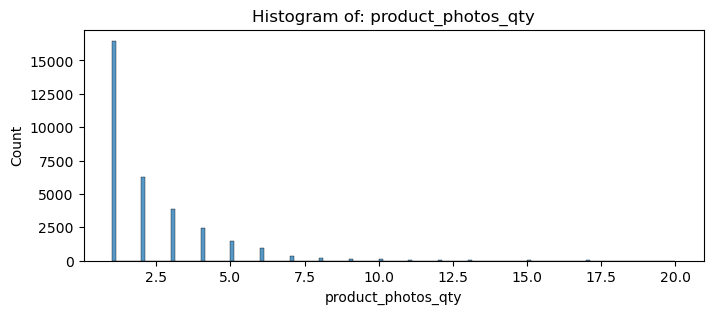



Analyzing variable: product_weight_g
Il y a 32949.0 entrées.
Il y a 2 valeurs manquantes
La valeur min. est de 0.00.
La valeur max. est de 40425.00.
La moyenne est de 2276.47.
L'étendue est de 40425.00.
Le premier quartile se situe à 300.00.
La médiane se situe à 700.00.
Le troisième quartile se situe à 1900.00.
L'écart interquartile est de 1600.00.
L'écart type est de 4282.04.


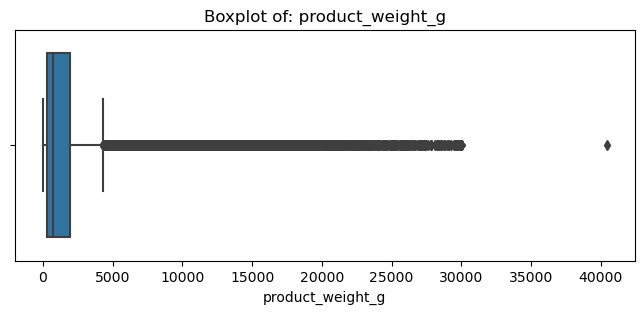

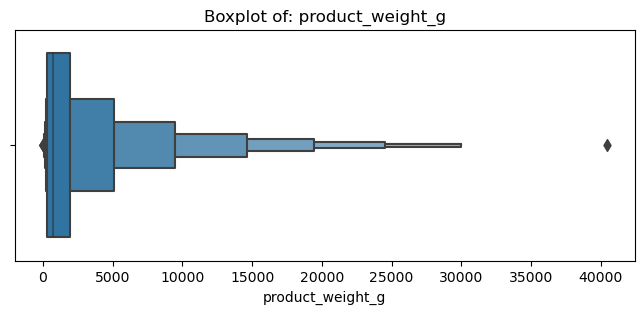

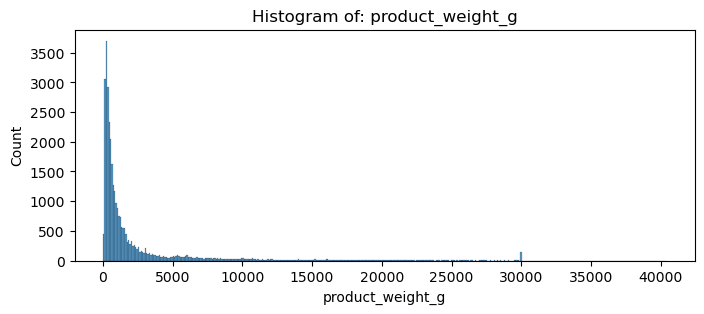



Analyzing variable: product_length_cm
Il y a 32949.0 entrées.
Il y a 2 valeurs manquantes
La valeur min. est de 7.00.
La valeur max. est de 105.00.
La moyenne est de 30.82.
L'étendue est de 98.00.
Le premier quartile se situe à 18.00.
La médiane se situe à 25.00.
Le troisième quartile se situe à 38.00.
L'écart interquartile est de 20.00.
L'écart type est de 16.91.


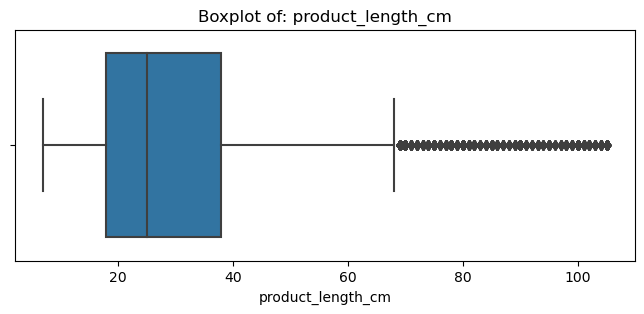

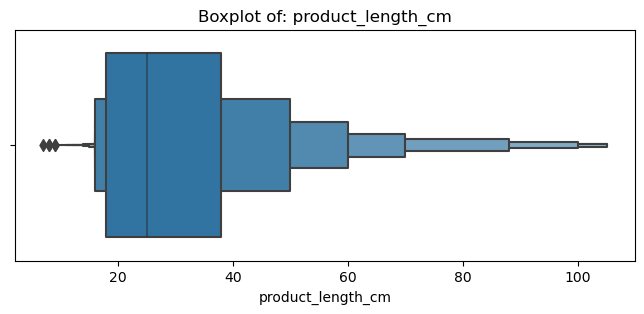

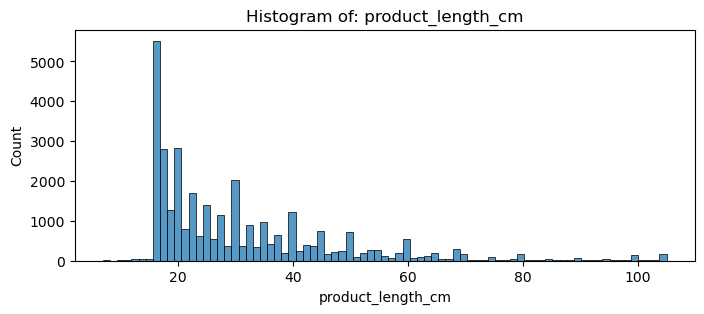



Analyzing variable: product_height_cm
Il y a 32949.0 entrées.
Il y a 2 valeurs manquantes
La valeur min. est de 2.00.
La valeur max. est de 105.00.
La moyenne est de 16.94.
L'étendue est de 103.00.
Le premier quartile se situe à 8.00.
La médiane se situe à 13.00.
Le troisième quartile se situe à 21.00.
L'écart interquartile est de 13.00.
L'écart type est de 13.64.


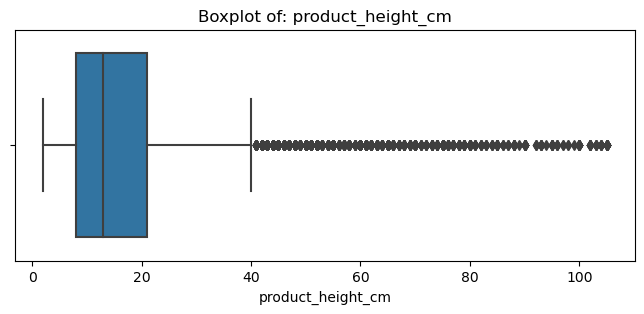

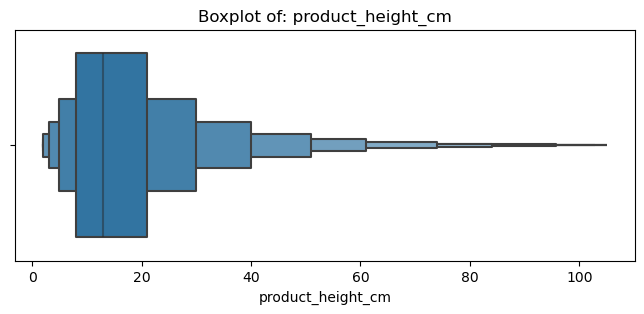

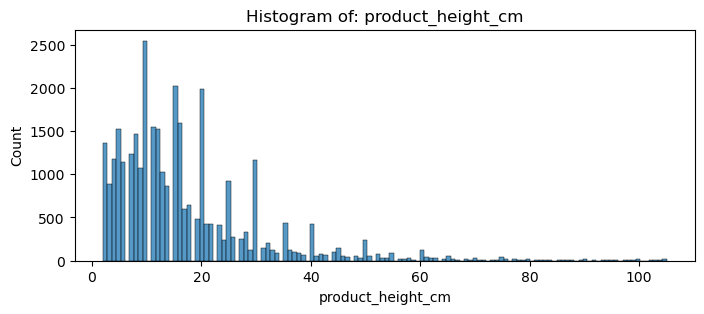



Analyzing variable: product_width_cm
Il y a 32949.0 entrées.
Il y a 2 valeurs manquantes
La valeur min. est de 6.00.
La valeur max. est de 118.00.
La moyenne est de 23.20.
L'étendue est de 112.00.
Le premier quartile se situe à 15.00.
La médiane se situe à 20.00.
Le troisième quartile se situe à 30.00.
L'écart interquartile est de 15.00.
L'écart type est de 12.08.


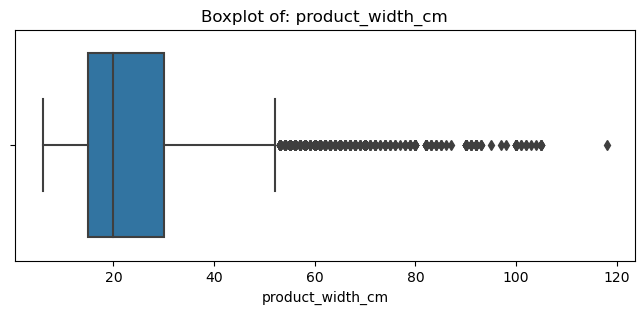

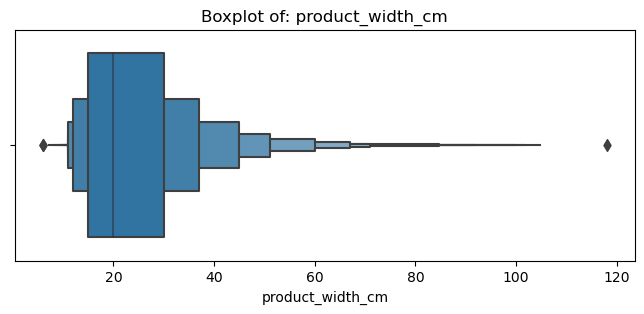

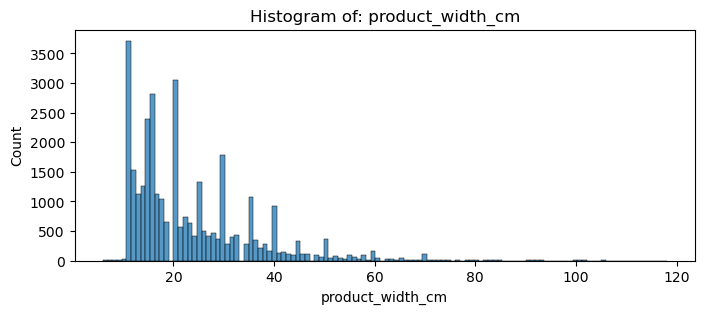

In [32]:
explore_quantitative_variables(olist_products_dataset) 

## olist_sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP



Number of Rows:  3095
Number of Columns:  4

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Unique values in seller_id:
['3442f8959a84dea7ee197c632cb2df15' 'd1b65fc7debc3361ea86b5f14c68d2e2'
 'ce3ad9de960102d0677a81f5d0bb7b2d' ... '74871d19219c7d518d0090283e03c137'
 'e603cf3fec55f8697c9059638d6c8eb5' '9e25199f6ef7e7c347120ff175652c3b']

Unique values in seller_zip_code_prefix:
[13023 13844 20031 ...  4650 96080 12051]

Unique values in seller_city:
['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anap

,N_unique values
seller_id,3095
seller_zip_code_prefix,2246
seller_city,611
seller_state,23



'type' column not found in dataframe.

Number of missing values:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


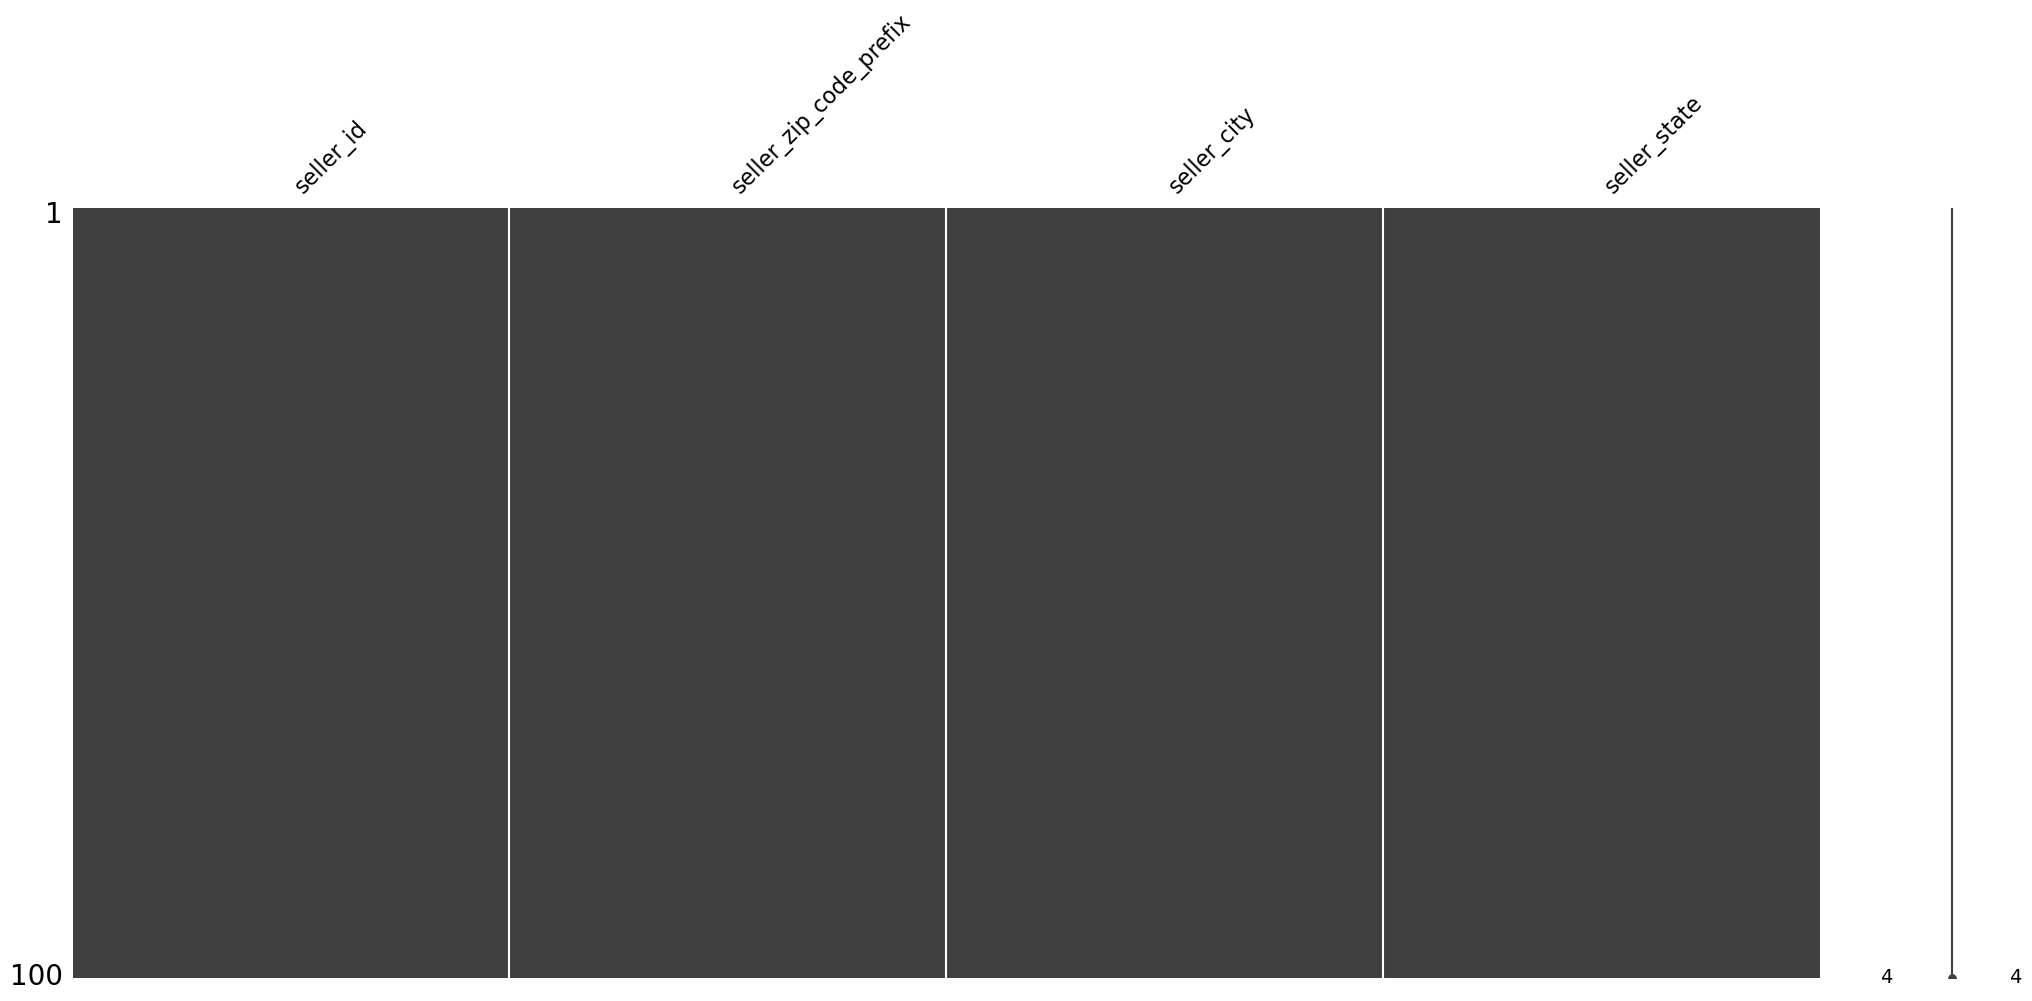

In [33]:
shape(olist_sellers_dataset)

In [34]:
explore_qualitative_variables(olist_sellers_dataset)



Analyzing variable: seller_id
Il y a 3095 entrées.
Il y a 0 valeurs manquantes
Il y a 3095 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à 3442f8959a84dea7ee197c632cb2df15.


Analyzing variable: seller_city
Il y a 3095 entrées.
Il y a 0 valeurs manquantes
Il y a 611 valeurs uniques.
Le mode est de 694.
La valeur du mode correspond à sao paulo.


Analyzing variable: seller_state
Il y a 3095 entrées.
Il y a 0 valeurs manquantes
Il y a 23 valeurs uniques.
Le mode est de 1849.
La valeur du mode correspond à SP.


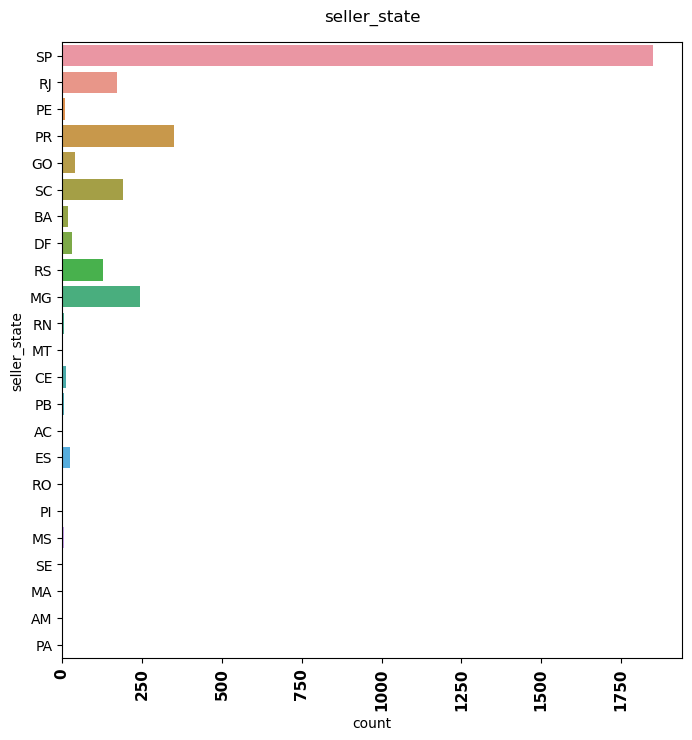

In [35]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=olist_sellers_dataset["seller_state"], y = olist_sellers_dataset["seller_state"].index)
Bplot.set_title("seller_state", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()




Analyzing variable: seller_zip_code_prefix
Il y a 3095.0 entrées.
Il y a 0 valeurs manquantes
La valeur min. est de 1001.00.
La valeur max. est de 99730.00.
La moyenne est de 32291.06.
L'étendue est de 98729.00.
Le premier quartile se situe à 7093.50.
La médiane se situe à 14940.00.
Le troisième quartile se situe à 64552.50.
L'écart interquartile est de 57459.00.
L'écart type est de 32713.45.


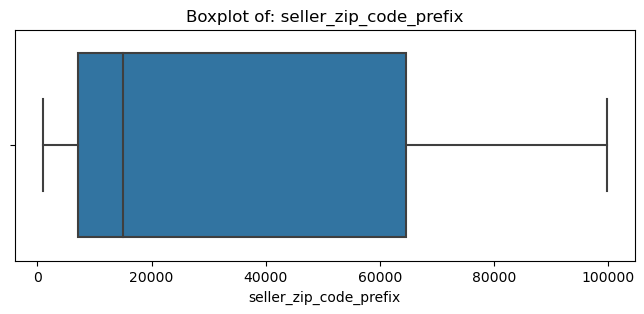

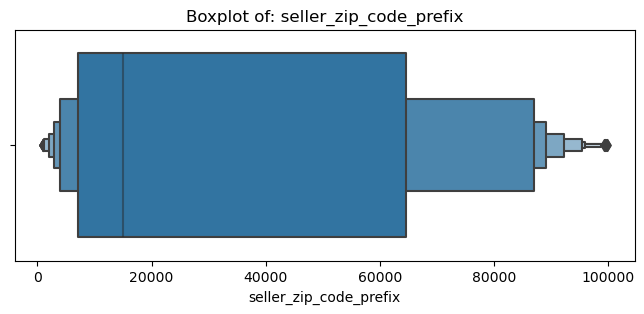

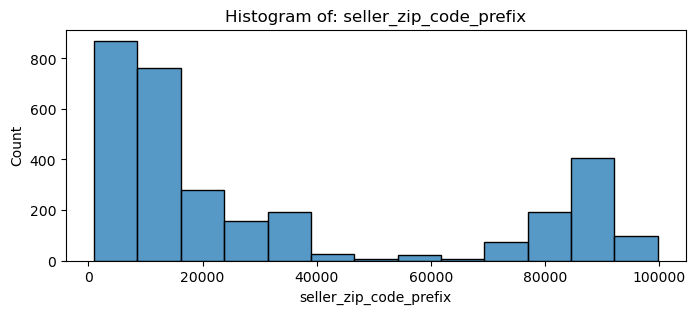

In [36]:
explore_quantitative_variables(olist_sellers_dataset) 

## product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services



Number of Rows:  71
Number of Columns:  2

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Unique values in product_category_name:
['beleza_saude' 'informatica_acessorios' 'automotivo' 'cama_mesa_banho'
 'moveis_decoracao' 'esporte_lazer' 'perfumaria' 'utilidades_domesticas'
 'telefonia' 'relogios_presentes' 'alimentos_bebidas' 'bebes' 'papelaria'
 'tablets_impressao_imagem' 'brinquedos' 'telefonia_fixa'
 'ferramentas_jardim' 'fashion_bolsas_e_acessorios' 'eletroportateis'
 'consoles_games' 'audio' 'fashion_calcados' 'cool_stuff'
 'malas_acessorios' 'climatizacao' 'construcao_ferramentas_construcao'
 'moveis_cozinha_area_de_servico_jantar_e_jardim'


,N_unique values
product_category_name,71
product_category_name_english,71



'type' column not found in dataframe.

Number of missing values:
product_category_name            0
product_category_name_english    0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


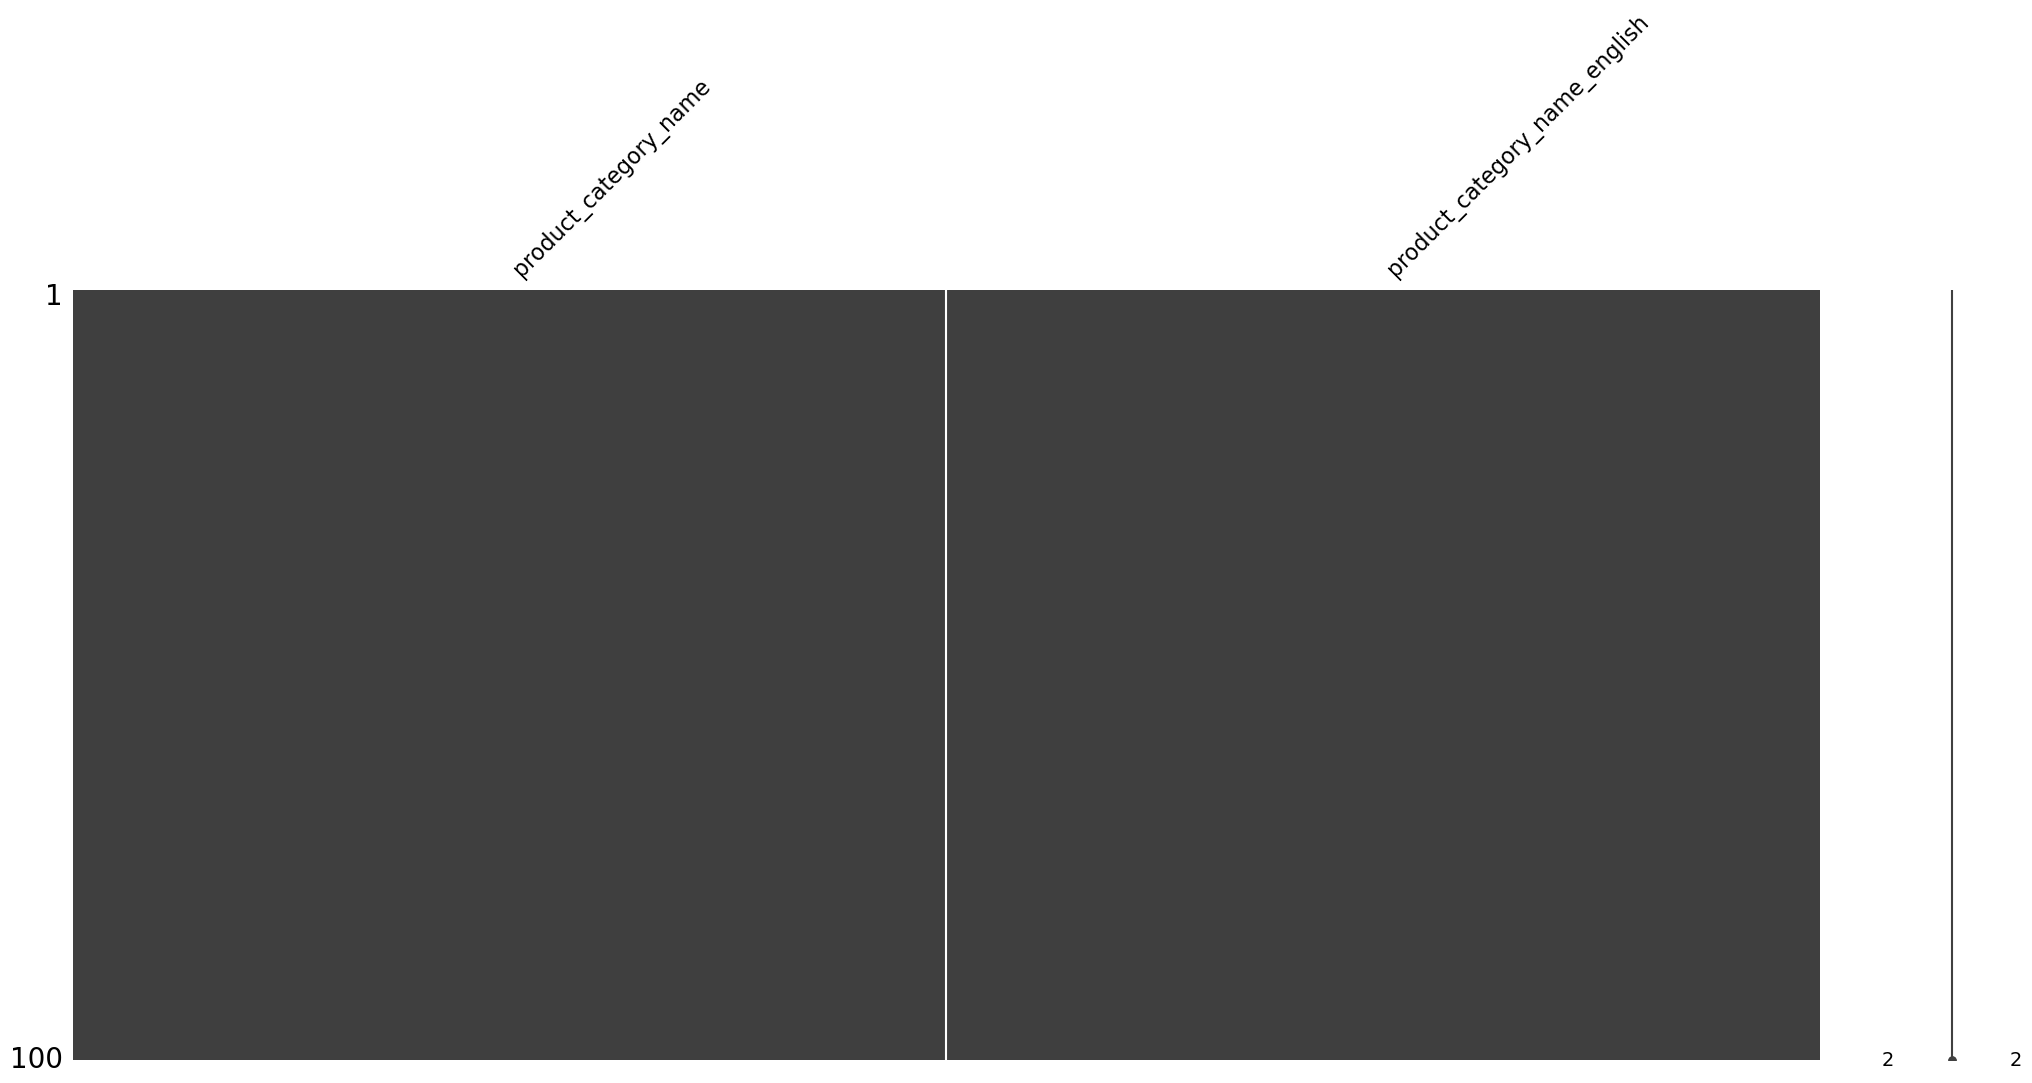

In [37]:
shape(product_category_name_translation)

In [38]:
explore_qualitative_variables(product_category_name_translation)



Analyzing variable: product_category_name
Il y a 71 entrées.
Il y a 0 valeurs manquantes
Il y a 71 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à beleza_saude.


Analyzing variable: product_category_name_english
Il y a 71 entrées.
Il y a 0 valeurs manquantes
Il y a 71 valeurs uniques.
Le mode est de 1.
La valeur du mode correspond à health_beauty.


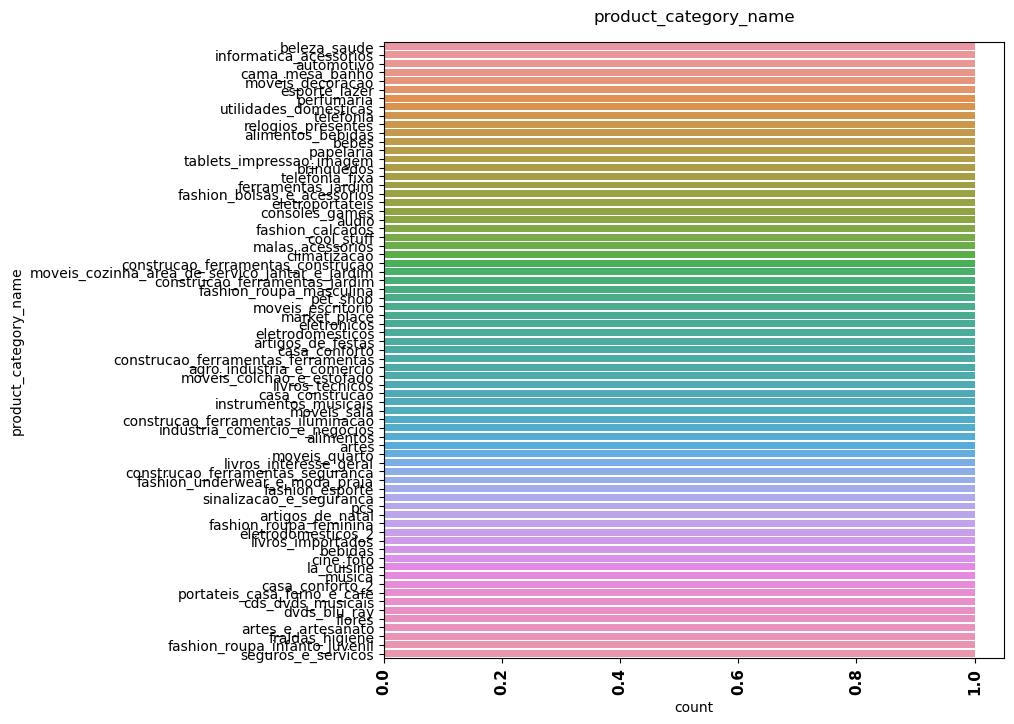

In [39]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=product_category_name_translation["product_category_name"], y = product_category_name_translation["product_category_name"].index)
Bplot.set_title("product_category_name", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()

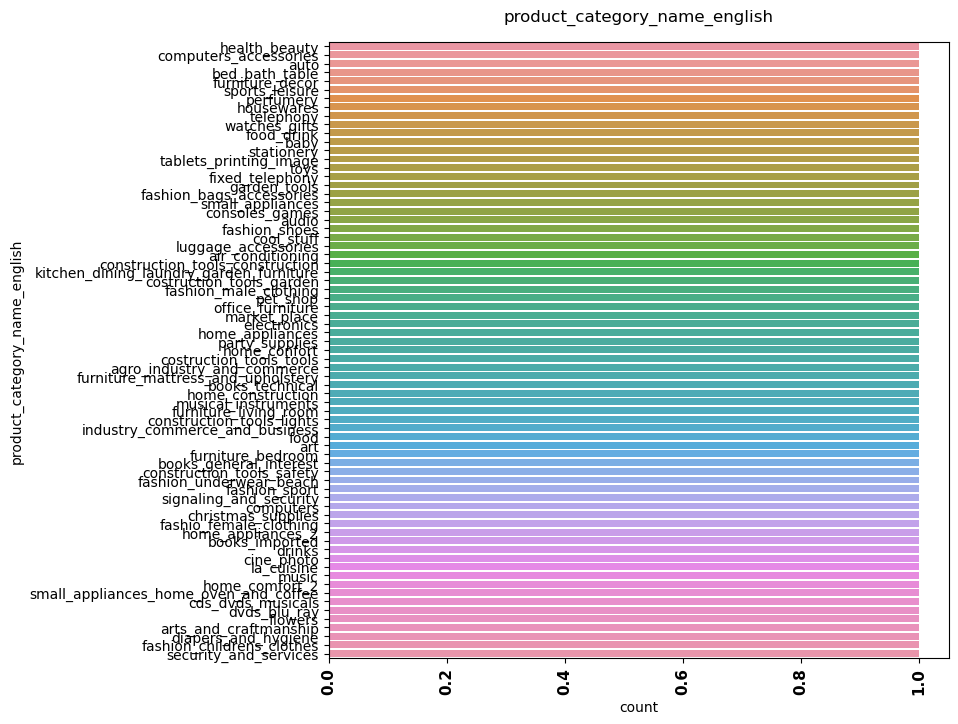

In [40]:
fig = plt.figure(figsize=(8,8)) 
Bplot = sns.countplot(data=product_category_name_translation["product_category_name_english"], y = product_category_name_translation["product_category_name_english"].index)
Bplot.set_title("product_category_name_english", pad = 15)
plt.xticks(rotation=90,fontsize=11,fontweight='bold')
plt.show()

In [41]:
# Il n'y a pas de variables quantitatives dans ce dataframe.
explore_quantitative_variables(product_category_name_translation)

# Merging


8 datasets can be directly linked with a column, execpt product_category_name_translation.csv 
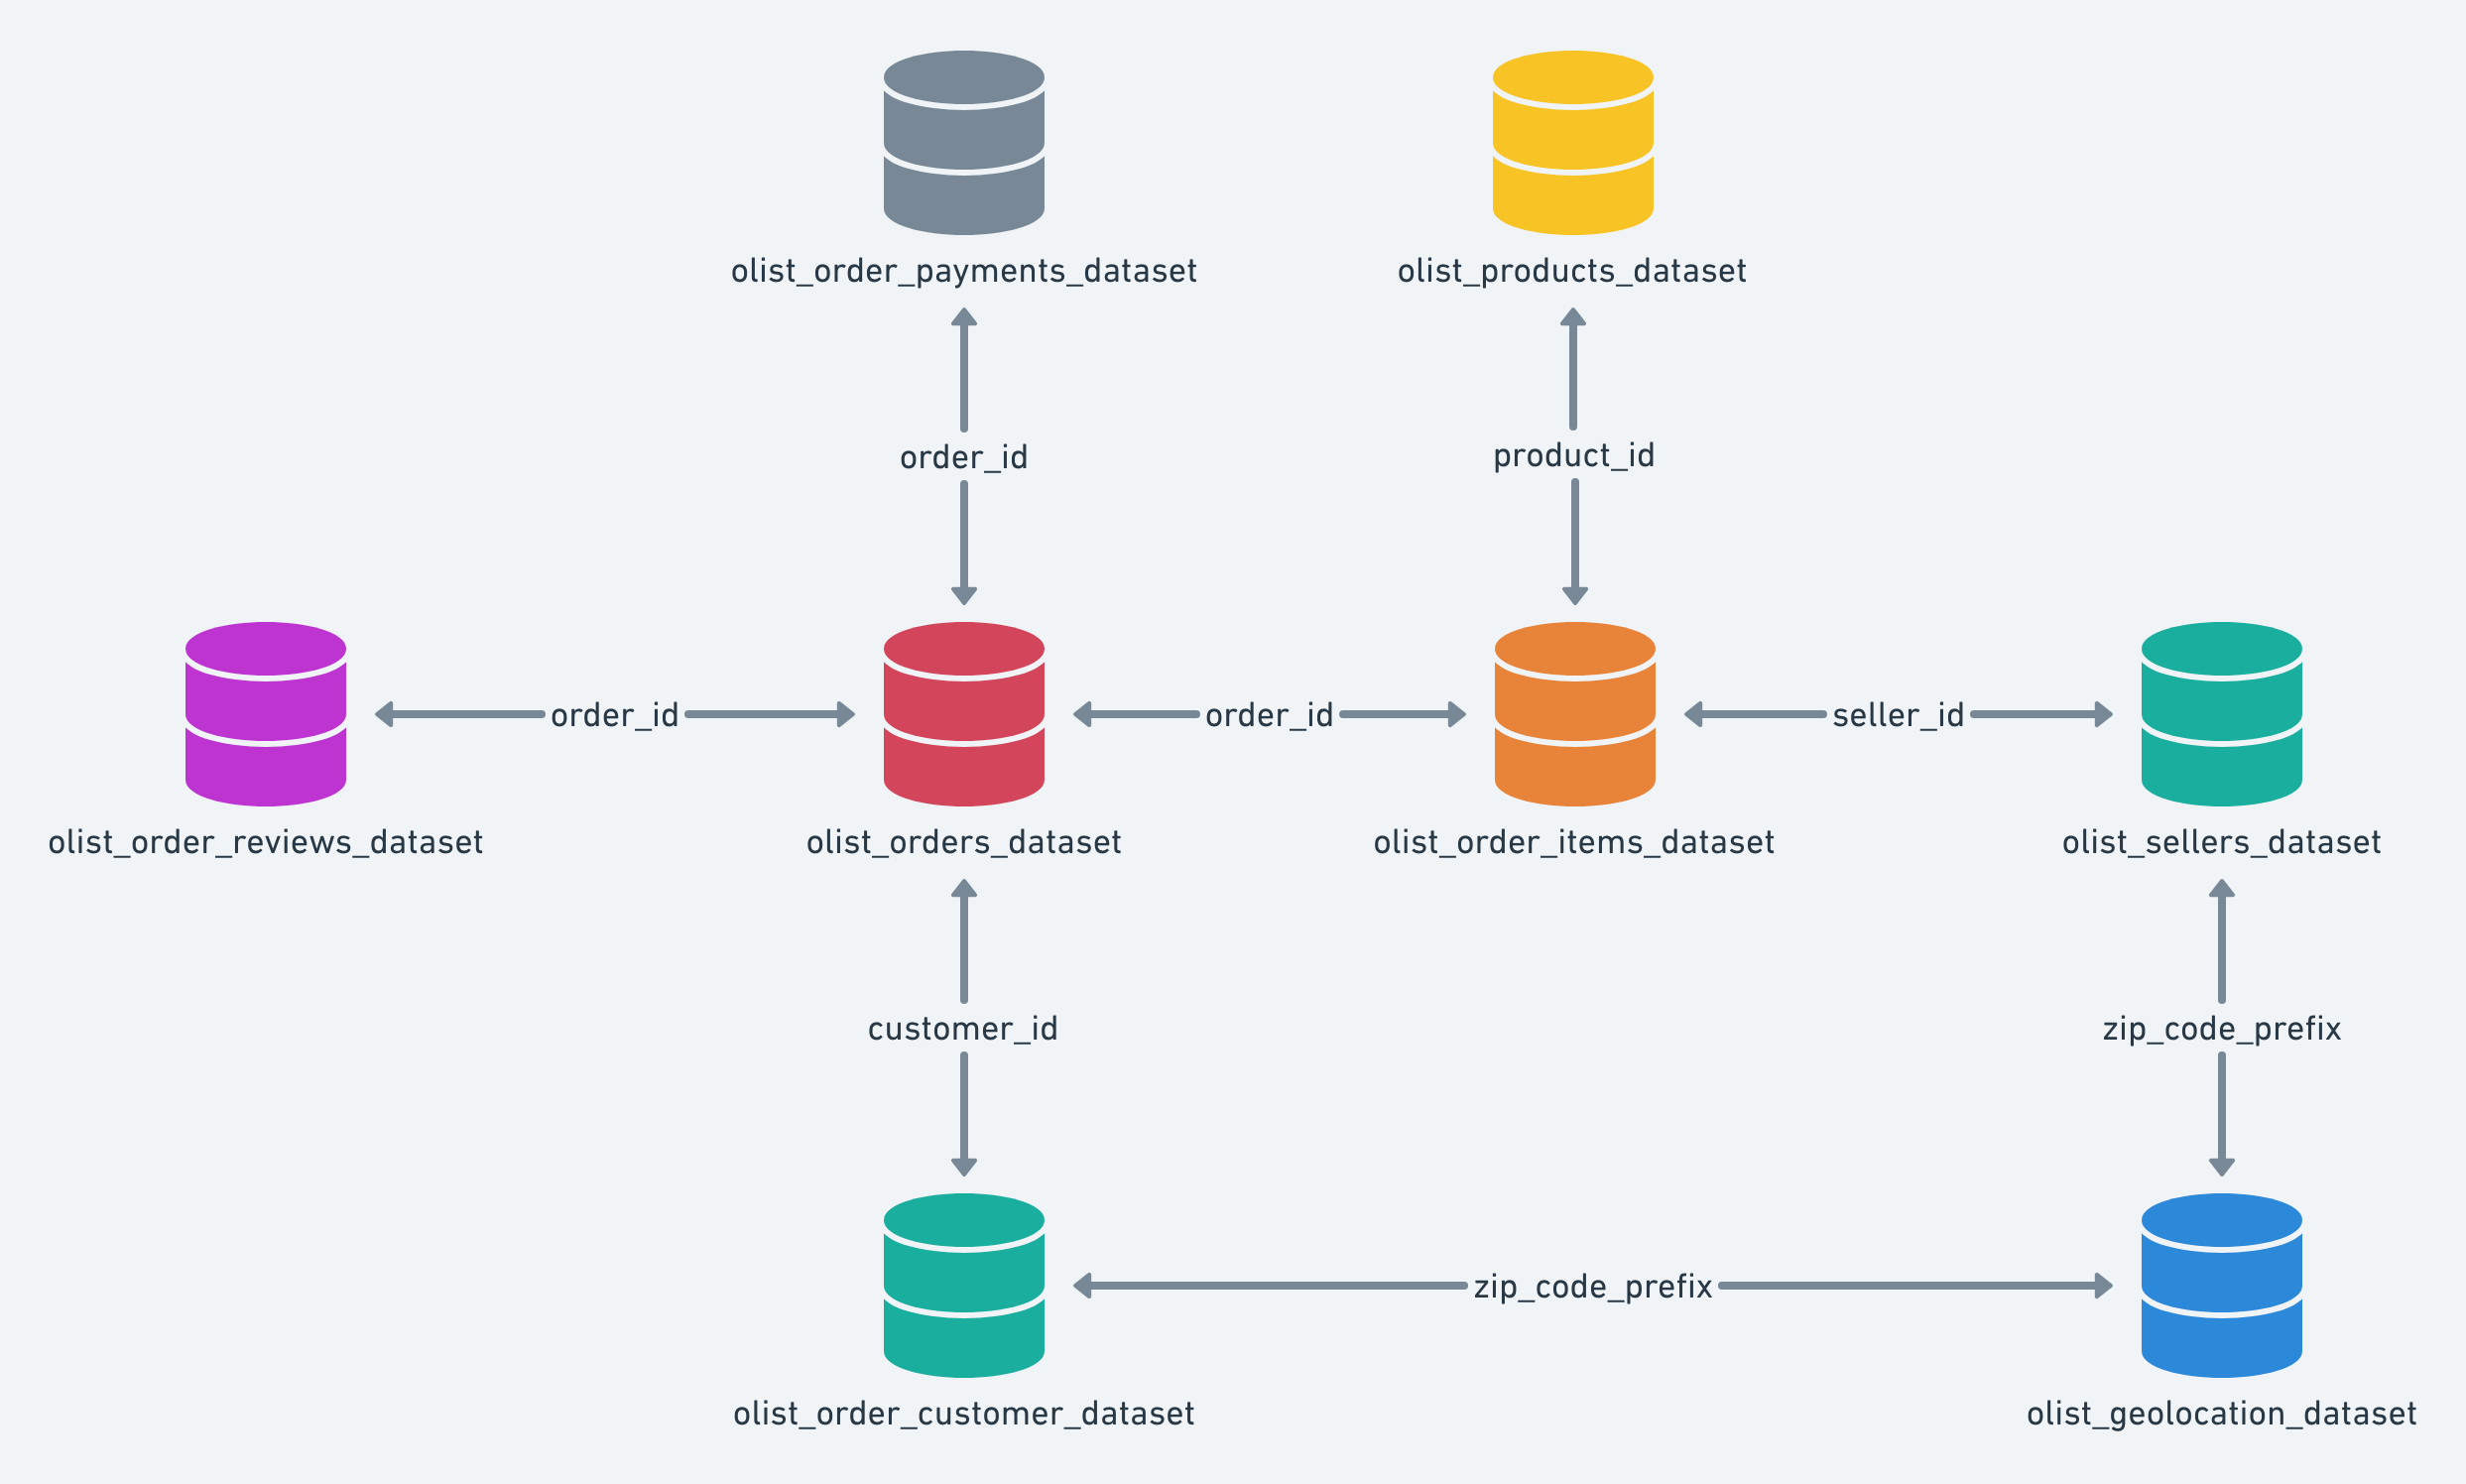

In [48]:
# Nous mergons tous les dataframes sauf celui manquant : product_category_name_translation.csv

df = pd.merge(olist_orders_dataset, olist_order_items_dataset, on='order_id', how='left')
df = pd.merge(df, olist_order_payments_dataset, on='order_id', how='left')
df = pd.merge(df, olist_order_reviews_dataset, on='order_id', how='left')
df = pd.merge(df, olist_customers_dataset, on='customer_id', how='left')
df = pd.merge(df, olist_products_dataset, on='product_id', how='left')
df = pd.merge(df, olist_sellers_dataset, on='seller_id', how='left')
df = pd.merge(df, olist_geolocation_dataset, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
#shape(df)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350.0,maua,SP,9350.0,-23.680114,-46.452454,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350.0,maua,SP,9350.0,-23.675223,-46.441038,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350.0,maua,SP,9350.0,-23.685712,-46.444796,mauá,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350.0,maua,SP,9350.0,-23.679951,-46.448247,maua,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,9350.0,maua,SP,9350.0,-23.678662,-46.442578,maua,SP
17094336,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,7.0,15.0,14407.0,franca,SP,14407.0,-20.486153,-47.420998,franca,SP
17094337,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,7.0,15.0,14407.0,franca,SP,14407.0,-20.475119,-47.414534,franca,SP
17094338,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,7.0,15.0,14407.0,franca,SP,14407.0,-20.488723,-47.409148,franca,SP
17094339,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,7.0,15.0,14407.0,franca,SP,14407.0,-20.475478,-47.414575,franca,SP
17094340,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,...,7.0,15.0,14407.0,franca,SP,14407.0,-20.509864,-47.427484,franca,SP



Number of Rows:  17094341
Number of Columns:  44

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17094341 entries, 0 to 17094340
Data columns (total 44 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   order_item_id                  float64
 9   product_id                     object 
 10  seller_id                      object 
 11  shipping_limit_date            object 
 12  price                          float64
 13  freight_value                  float64
 14  payment_sequential             float64
 15  payment_type                   object 
 16  payment_installments           

,N_unique values
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459
order_item_id,21
product_id,32951



'type' column not found in dataframe.

Number of missing values:
order_id                                0
customer_id                             0
order_status                            0
order_purchase_timestamp                0
order_approved_at                    2244
order_delivered_carrier_date       180266
order_delivered_customer_date      367351
order_estimated_delivery_date           0
order_item_id                         833
product_id                            833
seller_id                             833
shipping_limit_date                   833
price                                 833
freight_value                         833
payment_sequential                    423
payment_type                          423
payment_installments                  423
payment_value                         423
review_id                          141886
review_score                       141886
review_comment_title             15161626
review_comment_message            9904933
review_cre

# Cleaning